#Introduction

Here is the code related to the development of Machine Learning models for predicting the onset and oxidation potentials of methanol and ethanol electrooxidation. The complete work is presented in the article titled "Machine Learning Prediction of Onset and Oxidation Potentials for Methanol and Ethanol Electrooxidation: Comprehensive Analysis and Experimental Validation."

# Basic code initialization

In [1]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 5.7 MB/s eta 0:00:00


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
from skimage import io
from PIL import Image
from matplotlib.ticker import PercentFormatter
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, mean_absolute_error
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
import shap
from shap.models import Model
import shap
from scipy.stats import t

In [3]:
date = pd.read_csv('https://raw.githubusercontent.com/TWvonZuben/methanol-and-ethanol-oxidation/main/date_july.csv')

# Oxidation potential prediction

### Features selection

From the database, an analysis of the correlation between the features and the oxidation potential resulted in the selection of 49 features to develop the oxidation potential prediction model


In [4]:
# organizing the database
date = pd.read_csv('https://raw.githubusercontent.com/TWvonZuben/methanol-and-ethanol-oxidation/main/date_july.csv')

#Join Graphene:

#rGO, GO and G together

#GO, GO -> O

G_modification = date[["G","GO","rGO"]]
G_modification = G_modification.sum(axis = 1)

date.insert(loc=76, column = 'graphene', value = G_modification)


date['graphene'] = date['graphene'].replace(2,1)
date['graphene'] = date['graphene'].replace(3,1)
date['graphene'] = date['graphene'].replace(4,1)

#Join N

#aniline -> N

N_modification = date[["N","Aniline"]]
N_modification = N_modification.sum(axis = 1)

date.insert(loc=76, column = 'N_Aniline', value = N_modification)

date['N_Aniline'] = date['N_Aniline'].replace(2,1)

#Polymer, Org, MOF, CNT, C, graphene -> C

C_modification = date[["C","Polymer", "MOF", "graphene", 'CNT', 'Org']]
C_modification = C_modification.sum(axis = 1)

date.insert(loc=76, column = 'carbons', value = C_modification)

date['carbons'] = date['carbons'].replace(2,1)
date['carbons'] = date['carbons'].replace(3,1)
date['carbons'] = date['carbons'].replace(4,1)
date['carbons'] = date['carbons'].replace(5,1)
date['carbons'] = date['carbons'].replace(6,1)

## join materials and working electrode base

C_modification = date[["C","W-C"]]
C_modification = C_modification.sum(axis = 1)

date.insert(loc=76, column = '_C', value = C_modification)

date['_C'] = date['_C'].replace(2,1)

Ni_modification = date[["Ni","W-Ni"]]
Ni_modification = Ni_modification.sum(axis = 1)

Ti_modification = date[["Ti","W-Ti"]]
Ti_modification = Ti_modification.sum(axis = 1)

date.insert(loc=76, column = '_Ni', value = Ni_modification)
date.insert(loc=76, column = '_Ti', value = Ti_modification)

date['_Ni'] = date['_Ni'].replace(2,1)
date['_Ti'] = date['_Ti'].replace(3,1)

Pt_modification = date[["Pt","W-Pt"]]
Pt_modification = Pt_modification.sum(axis = 1)

Au_modification = date[["Au","W-Au"]]
Au_modification = Au_modification.sum(axis = 1)

Cu_modification = date[["Cu","W-Cu"]]
Cu_modification = Cu_modification.sum(axis = 1)


date.insert(loc=76, column = '_Pt', value = Pt_modification)
date.insert(loc=76, column = '_Au', value = Au_modification)
date.insert(loc=76, column = '_Cu', value = Cu_modification)


date['_Pt'] = date['_Pt'].replace(2,1)
date['_Au'] = date['_Au'].replace(2,1)
date['_Cu'] = date['_Cu'].replace(2,1)


Pd_modification = date[["Pd","W-Pd"]]
Pd_modification = Pd_modification.sum(axis = 1)

date.insert(loc=76, column = '_Pd', value = Pd_modification)


date['_Pd'] = date['_Pd'].replace(2,1)

In_modification = date[["In","W-In"]]
In_modification = In_modification.sum(axis = 1)

date.insert(loc=76, column = '_In', value = In_modification)


date['_In'] = date['_In'].replace(2,1)

Sn_modification = date[["Sn","W-Sn"]]
Sn_modification = Sn_modification.sum(axis = 1)

date.insert(loc=6, column = '_Sn', value = Sn_modification)

date['_Sn'] = date['_Sn'].replace(2,1)

Fe_modification = date[["Fe","W-Fe"]]
Fe_modification = Fe_modification.sum(axis = 1)

date.insert(loc=76, column = '_Fe', value = Fe_modification)


date['_Fe'] = date['_Fe'].replace(2,1)

Al_modification = date[["Al","W-Al"]]
Al_modification = Al_modification.sum(axis = 1)

date.insert(loc=76, column = '_Al', value = Al_modification)


date['_Al'] = date['_Al'].replace(2,1)


Pl_modification = date[["Polymer","W-Polymer"]]
Pl_modification = Pl_modification.sum(axis = 1)

date.insert(loc=76, column = '_Polymer', value = Pl_modification)


date['_Polymer'] = date['_Polymer'].replace(2,1)


W_carbon_modification = date[["W-GCE", "W-graphene", "W-C", "W-Polymer"]]
W_carbon_modification = W_carbon_modification.sum(axis = 1)

date.insert(loc=76, column = 'W-carbons', value = W_carbon_modification)

date['W-carbons'] = date['W-carbons'].replace(2,1)
date['W-carbons'] = date['W-carbons'].replace(4,1)
date['W-carbons'] = date['W-carbons'].replace(4,1)
date['W-carbons'] = date['W-carbons'].replace(4,1)
date['W-carbons'] = date['W-carbons'].replace(5,1)


carbon_modification = date[["W-carbons","carbons"]]
carbon_modification = carbon_modification.sum(axis=1)


date.insert(loc=76, column = '_carbons', value = carbon_modification)

date['_carbons'] = date['_carbons'].replace(2,1)

N_modification = date[["W-N","N"]]
N_modification = N_modification.sum(axis = 1)

date.insert(loc=76, column = '_N', value = N_modification)

date['_N'] = date['_N'].replace(2,1)


aniline_modification = date[["Aniline","_N"]]
aniline_modification = aniline_modification.sum(axis = 1)

date.insert(loc=76, column = '_Aniline_N', value = aniline_modification)

date['_Aniline_N'] = date['_Aniline_N'].replace(2,1)


positive_modification = date[["_Sn","W-Ti", 'Si','W-In','Fe','W-Ni','La']] #Include some features that exhibited a positive correlation.
positive_modification = positive_modification.sum(axis = 1)

date.insert(loc=76, column = 'positive', value = positive_modification)

date['positive'] = date['positive'].replace(2,1)
date['positive'] = date['positive'].replace(3,1)
date['positive'] = date['positive'].replace(4,1)
date['positive'] = date['positive'].replace(5,1)
date['positive'] = date['positive'].replace(6,1)
date['positive'] = date['positive'].replace(7,1)

negative_modification = date[['Cu','_Cu']]
negative_modification = negative_modification.sum(axis = 1)

date.insert(loc=76, column = 'negative', value = negative_modification) #Include some features that exhibited a negative correlation.

date['negative'] = date['negative'].replace(2,1)
date['negative'] = date['negative'].replace(3,1)
date['negative'] = date['negative'].replace(4,1)

In [5]:
eletrolyte = pd.get_dummies(date["Eletrolyte"])
reference = pd.get_dummies(date["reference"])

In [6]:
date_features = date.copy()

In [7]:
date_features = date_features.join(eletrolyte)
date_features = date_features.join(reference)

In [8]:
date_features = date_features.drop("DOI", axis=1)
date_features = date_features.drop("Ano", axis=1)
date_features = date_features.drop("WE", axis=1)
date_features = date_features.drop("Material", axis=1)
date_features = date_features.drop("analyte", axis=1)
date_features = date_features.drop("Eletrolyte", axis=1)
date_features = date_features.drop("reference", axis=1)

In [9]:
features_normalized = date_features.loc[:, :].values

# scalando as features (mean = 0 and variance = 1)
features_normalized = StandardScaler().fit_transform(features_normalized)
features_normalized = pd.DataFrame(features_normalized)

header = list(date_features.columns.values)
features_normalized.set_axis(header, axis=1,inplace=True)
correlation = features_normalized.corr()

DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead


In [10]:
correlation.to_csv('correlation.csv')

In [11]:
date_model_ox = date_features.copy()
date_model_ox.dropna(subset = ['Pot_Ox_V (SHE)'], axis=0, inplace = True)
date_model_ox.dropna(subset = ['pH'], axis=0, inplace = True)
date_model_ox.dropna(subset = ['El_conc'], axis=0, inplace = True)

In [12]:
mean_J = date_model_ox['J__mA_cm'].mean()
date_model_ox['J__mA_cm'] = date_model_ox['J__mA_cm'].replace(np.nan, mean_J)

In [13]:
mean_conc = date_model_ox['concentration'].mean()
date_model_ox['concentration'] = date_model_ox['concentration'].replace(np.nan, mean_conc)

In [14]:
mean_ox = date_model_ox['Ox_Onset'].mean()
date_model_ox['Ox_Onset'] = date_model_ox['Ox_Onset'].replace(np.nan, mean_ox)

In [15]:
date_model_ox = date_model_ox.replace(np.nan,0)

In [16]:
X = date_model_ox[['W-carbons','carbons','C', 'Org', 'W-graphite','W-C', 'W-Sn','W-Au','Au','W-Pd','Pd','_In','W-Fe','_Ni','Ni','Pt','W-Pt', 'W-N','O','Zn','Ag','Ru','B','Zr','Ce','Bi','W','Sb','Te', 'Cu', '_Cu', 'Rh','_Sn', 'positive','pH','El_conc','methanol','ethanol','H2SO4','HClO4','KOH','NaOH','Hg/HgO','MMS','RHE','SCE', 'J__mA_cm', 'concentration', 'Ox_Onset']]
y = date_model_ox['Pot_Ox_V (SHE)']

## Algorithm study

Comparison between the algorithms used to develop the model. The Random Forest regression exhibited the best results and was selected.

### Linear regression

In [17]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
reg_model = linear_model.LinearRegression()

reg_model = LinearRegression().fit(X_train, y_train)

print('Intercept: ',reg_model.intercept_)

list(zip(X, reg_model.coef_))

y_pred= reg_model.predict(X_test)
x_pred= reg_model.predict(X_train)

reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)

print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)


Intercept:  1.0642948471711788
Mean Absolute Error: 0.19128906346653451
Mean Square Error: 0.07286962665019152
Root Mean Square Error: 0.26994374719595104
R2 Score: 0.522531842214706


Intercept:  1.0642948471711788

Mean Absolute Error: 0.19128906346653451

Mean Square Error: 0.07286962665019152

Root Mean Square Error: 0.26994374719595104

R2 Score: 0.522531842214706

### Random forest regression

In [18]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

model = RandomForestRegressor(random_state=7)
model.fit(X_train, y_train)

y_pred= model.predict(X_test)

reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)

print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)

Mean Absolute Error: 0.11377630358974361
Mean Square Error: 0.030563911894574157
Root Mean Square Error: 0.17482537543095442
R2 Score: 0.7997341913515074


Mean Absolute Error: 0.11377630358974361

Mean Square Error: 0.030563911894574157

Root Mean Square Error: 0.17482537543095442

R2 Score: 0.7997341913515074


In [19]:
# Tuning the hyper-parameters for Random Forest

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

param_grid = {
    'n_estimators': [1,10, 50, 100, 200],
    'random_state': [0, 1, 2, 3, 4, 5 , 6, 7, 8, 9, 10],
    'max_depth': [None, 1, 2, 3, 4, 5],
    'criterion': ['friedman_mse', 'absolute_error', 'squared_error']
}

best_rmse = float('inf')
best_params = {}

for n_estimators in param_grid['n_estimators']:
  for random_state in param_grid['random_state']:
    for max_depth in param_grid['max_depth']:
      model = RandomForestRegressor(n_estimators=n_estimators, random_state = random_state)
      model.fit(X_train, y_train)

      y_pred = model.predict(X_test)
      rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

      if rmse < best_rmse :
        best_rmse = rmse
        best_params = {
        'n_estimators': n_estimators,
        'random_state': random_state,
        'max_depth': max_depth,
        }
        print(f"Best_params: n_estimators={n_estimators}, random_state={random_state}, max_depth={max_depth}")
        print(f"RMSE: {rmse:.4f}")
        print("------------------------")


      print(f"Parameters: n_estimators={n_estimators}, random_state={random_state}, max_depth={max_depth}")
      print(f"RMSE: {rmse:.4f}")
      print("------------------------")

best_model = RandomForestRegressor(**best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('Best parameters:', best_params)
print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)

Best_params: n_estimators=1, random_state=0, max_depth=None
RMSE: 0.2399
------------------------
Parameters: n_estimators=1, random_state=0, max_depth=None
RMSE: 0.2399
------------------------
Parameters: n_estimators=1, random_state=0, max_depth=1
RMSE: 0.2399
------------------------
Parameters: n_estimators=1, random_state=0, max_depth=2
RMSE: 0.2399
------------------------
Parameters: n_estimators=1, random_state=0, max_depth=3
RMSE: 0.2399
------------------------
Parameters: n_estimators=1, random_state=0, max_depth=4
RMSE: 0.2399
------------------------
Parameters: n_estimators=1, random_state=0, max_depth=5
RMSE: 0.2399
------------------------
Parameters: n_estimators=1, random_state=1, max_depth=None
RMSE: 0.3153
------------------------
Parameters: n_estimators=1, random_state=1, max_depth=1
RMSE: 0.3153
------------------------
Parameters: n_estimators=1, random_state=1, max_depth=2
RMSE: 0.3153
------------------------
Parameters: n_estimators=1, random_state=1, max_de

Best parameters: {'n_estimators': 100, 'random_state': 6, 'max_depth': None}

Mean Absolute Error: 0.11063670615384623

Mean Square Error: 0.029414370507412996

Root Mean Square Error: 0.17150618212593094

R2 Score: 0.8072664024201961

###  XGBoost Regression

In [20]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)


model = xgb.XGBRegressor()
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=0)

y_pred= model.predict(X_test)

reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)

print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)

Mean Absolute Error: 0.1281674180740882
Mean Square Error: 0.03850461043125201
Root Mean Square Error: 0.1962259168184774
R2 Score: 0.7477038616225435


Mean Absolute Error: 0.12800491367221833

Mean Square Error: 0.03661024979505674

Root Mean Square Error: 0.19133805109035876

R2 Score: 0.7601163978838743

In [21]:
# Tuning the hyper-parameters for XGBoost regression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

param_grid = {
    'n_estimators': [1,10, 50, 100, 200],
    'random_state': [0, 1, 2, 3, 4, 5 , 6, 7, 8, 9, 10],
    'max_depth': [None, 1, 2, 3, 4, 5],
    'criterion': ['friedman_mse', 'absolute_error', 'squared_error']
}

best_rmse = float('inf')
best_params = {}

for n_estimators in param_grid['n_estimators']:
  for random_state in param_grid['random_state']:
    for max_depth in param_grid['max_depth']:
      model = xgb.XGBRegressor(n_estimators=n_estimators, random_state = random_state)
      model.fit(X_train, y_train)

      y_pred = model.predict(X_test)
      rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

      if rmse < best_rmse :
        best_rmse = rmse
        best_params = {
        'n_estimators': n_estimators,
        'random_state': random_state,
        'max_depth': max_depth,
        }
        print(f"Best_params: n_estimators={n_estimators}, random_state={random_state}, max_depth={max_depth}")
        print(f"RMSE: {rmse:.4f}")
        print("------------------------")


print(f"Parameters: n_estimators={n_estimators}, random_state={random_state}, max_depth={max_depth}")
print(f"RMSE: {rmse:.4f}")
print("------------------------")

model = xgb.XGBRegressor(**best_params)
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=0)

y_pred= model.predict(X_test)

reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('Best parameters:', best_params)
print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)

Best_params: n_estimators=1, random_state=0, max_depth=None
RMSE: 0.3101
------------------------
Best_params: n_estimators=10, random_state=0, max_depth=None
RMSE: 0.2010
------------------------
Best_params: n_estimators=50, random_state=0, max_depth=None
RMSE: 0.1945
------------------------
Parameters: n_estimators=200, random_state=10, max_depth=5
RMSE: 0.1972
------------------------
Best parameters: {'n_estimators': 50, 'random_state': 0, 'max_depth': None}
Mean Absolute Error: 0.12634902851371047
Mean Square Error: 0.037823307802099956
Root Mean Square Error: 0.1944821529140912
R2 Score: 0.7521680029416298


Best parameters: {'n_estimators': 50, 'random_state': 0, 'max_depth': None}

Mean Absolute Error: 0.12550156533124546

Mean Square Error: 0.035902699801856675

Root Mean Square Error: 0.18948007758563082

R2 Score: 0.7647525214284066

## Model

In [23]:
X = date_model_ox[['W-carbons','carbons','C', 'Org', 'W-graphite','W-C', 'W-Sn','W-Au','Au','W-Pd','Pd','_In','W-Fe','_Ni','Ni','Pt','W-Pt', 'W-N','O','Zn','Ag','Ru','B','Zr','Ce','Bi','W','Sb','Te', 'Cu', '_Cu', 'Rh','_Sn', 'positive','pH','El_conc','methanol','ethanol','H2SO4','HClO4','KOH','NaOH','Hg/HgO','MMS','RHE','SCE', 'J__mA_cm', 'concentration', 'Ox_Onset']]
y = date_model_ox['Pot_Ox_V (SHE)']

In [24]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

model = RandomForestRegressor(n_estimators = 100, random_state=6)
model.fit(X_train, y_train)

y_pred= model.predict(X_test)

reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)

print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)

Mean Absolute Error: 0.11063670615384623
Mean Square Error: 0.029414370507412996
Root Mean Square Error: 0.17150618212593094
R2 Score: 0.8072664024201961


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

best_results = []

for random_state in range(1, 101):

    model = RandomForestRegressor(n_estimators=100, random_state=random_state)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    best_results.append({'Random State': random_state, 'RMSE': rmse, 'R2 Score': r2})

results_df = pd.DataFrame(best_results)

sorted_results = results_df.sort_values(by='RMSE', ascending=True)


In [26]:
best_20_ox = pd.DataFrame(sorted_results.head(20))
best_20_ox = best_20_ox.reset_index(drop=True)

In [27]:
predicted = []

for i in range (0,20) :

  model = RandomForestRegressor(n_estimators=100, random_state=best_20_ox['Random State'][i])
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  predicted.append(y_pred)

predicted_result = pd.DataFrame(predicted)

In [28]:
results = []

for i in range (1,21) :
  selected_rows = predicted_result.iloc[0:i]

  sum_rows = selected_rows.sum(axis=0)
  num_rows = selected_rows.shape[0]

  mean_values_rows = sum_rows / num_rows

  mae = metrics.mean_absolute_error(y_test, mean_values_rows)
  mse = metrics.mean_squared_error(y_test, mean_values_rows)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, mean_values_rows)

  results.append({'Number': i, 'RMSE': rmse, 'R2 Score': r2})

In [29]:
results = pd.DataFrame(results)

<Figure size 800x500 with 0 Axes>

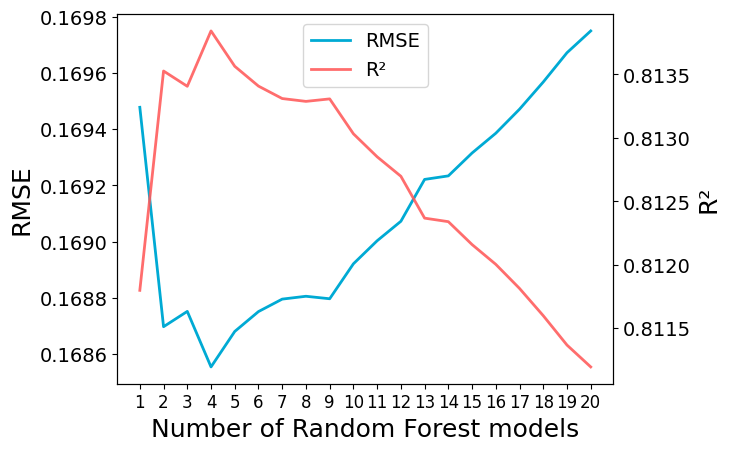

In [30]:
x = results['Number']
y1 = results['RMSE']
y2 = results['R2 Score']

plt.figure(figsize=(8, 5))

fig, ax1 = plt.subplots()

line1 = ax1.plot(x, y1, color='#00aad4ff', label='RMSE', linewidth=2)
ax1.set_xlabel('Number of Random Forest models', fontsize=18)
ax1.set_ylabel('RMSE', fontsize=18)
ax1.tick_params(axis='y', labelsize=14)

ax2 = ax1.twinx()
line2 = ax2.plot(x, y2, color='#ff5757dd', label='R²', linewidth=2)
ax2.set_ylabel('R²', fontsize=18)
ax2.tick_params(axis='y', labelsize=14)

lines = line1 + line2
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper center', fontsize=14)

ax1.set_xticks(x)
ax1.set_xticklabels(x.astype(int), fontsize=12)

plt.show()

Number = 4

RMSE = 0.168555

R²=	0.813843

In [31]:
predicted = []

for i in range (0,4) :

  model = RandomForestRegressor(n_estimators=100, random_state=best_20_ox['Random State'][i])
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  predicted.append(y_pred)

predicted_result = pd.DataFrame(predicted)

In [32]:
selected_rows = predicted_result.copy()

sum_rows = selected_rows.sum(axis=0)
num_rows = selected_rows.shape[0]

mean_values_rows = sum_rows / num_rows

mae = metrics.mean_absolute_error(y_test, mean_values_rows)
mse = metrics.mean_squared_error(y_test, mean_values_rows)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, mean_values_rows)

In [33]:
print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)

print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)

Mean Absolute Error: 0.11133618417582421
Mean Square Error: 0.028410639537956004
Root Mean Square Error: 0.1685545595288244
R2 Score: 0.8138432108783936


Mean Absolute Error: 0.11133618417582421

Mean Square Error: 0.028410639537956004

Root Mean Square Error: 0.1685545595288244

R2 Score: 0.8138432108783936


In [34]:
df = pd.DataFrame(y_test)
df = df.reset_index(drop=True)
df_dif = pd.DataFrame(mean_values_rows)
df_dif = df_dif.reset_index(drop=True)
df[1] = df_dif
diferenca_absoluta = (df['Pot_Ox_V (SHE)'] - df[1]).abs()
df_ordenado = df.sort_values(by=['Pot_Ox_V (SHE)', 1])
mean_values_rows = df_ordenado[1]
y_test = df_ordenado['Pot_Ox_V (SHE)']

In [35]:
real_value = y_test


In [36]:
pred_value = mean_values_rows

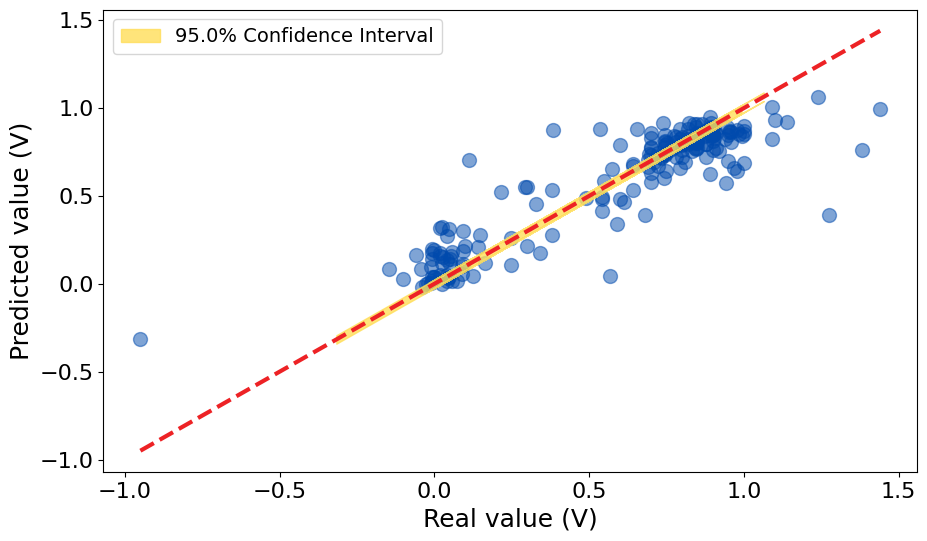

In [37]:
# Cria uma figura
plt.figure(figsize=(10.5, 6))

# Scatter plot para todas as previsões
plt.scatter(real_value, pred_value, c='#004aad', alpha=0.5, s=100)

# Linha diagonal
plt.plot([min(real_value), max(real_value)], [min(real_value), max(real_value)], '--', c='#ed2225', linewidth=3)

# Confidence level (e.g., 95%)
confidence_level = 0.95
alpha = 1 - confidence_level

# Calculate standard errors of coefficients
se_slope = np.sqrt(np.mean((real_value - pred_value) ** 2) / (len(real_value) - 2)) / np.std(pred_value)
se_intercept = se_slope * np.sqrt(np.mean(pred_value**2))

# Calculate t-critical value
t_critical = t.ppf(1 - alpha / 2, df=len(real_value) - 2)

# Calculate confidence intervals for slope and intercept
slope_interval = t_critical * se_slope
intercept_interval = t_critical * se_intercept

# Generate predictions and prediction intervals

lower_bound = pred_value - t_critical * np.sqrt(np.mean((real_value - pred_value) ** 2) / (len(real_value) - 2))
upper_bound = pred_value + t_critical * np.sqrt(np.mean((real_value - pred_value) ** 2) / (len(real_value) - 2))


# Configurações do gráfico
plt.xlabel('Real value (V)', fontsize=18)
plt.ylabel('Predicted value (V)', fontsize=18)
plt.fill_between(pred_value, lower_bound, upper_bound, color='#ffde59', alpha=0.8, label=f'{confidence_level * 100}% Confidence Interval')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(fontsize=14)
plt.savefig("grafico_com_barras_de_erro.png", bbox_inches='tight', transparent=True)
plt.show()

In [38]:
# Feature Importance

feature_importances_list = []

random_state_values = [45]

for random_state in random_state_values:
    rf = RandomForestRegressor(n_estimators=100, random_state=random_state)
    rf.fit(X, y)

    importances = rf.feature_importances_

    feature_importances_list.append(rf.feature_importances_)

feature_importances_matrix = np.array(feature_importances_list)

average_feature_importances = np.mean(feature_importances_matrix, axis=0)

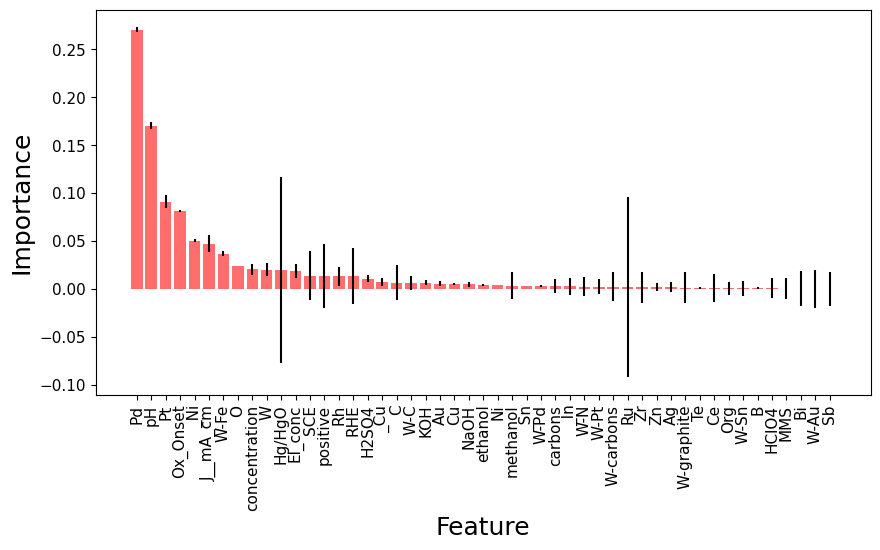

In [39]:
random_forest = rf

feature_importance = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': average_feature_importances})

feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

std_deviation = np.std([tree.feature_importances_ for tree in random_forest.estimators_], axis=0)
feature_importance_df['Std_Dev'] = std_deviation

bar_color = '#ff5757dd'

plt.figure(figsize=(10, 5))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color=bar_color, yerr=feature_importance_df['Std_Dev'])
plt.xticks(rotation=90, fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel('Feature', fontsize=18)
plt.ylabel('Importance', fontsize=18)
plt.show()

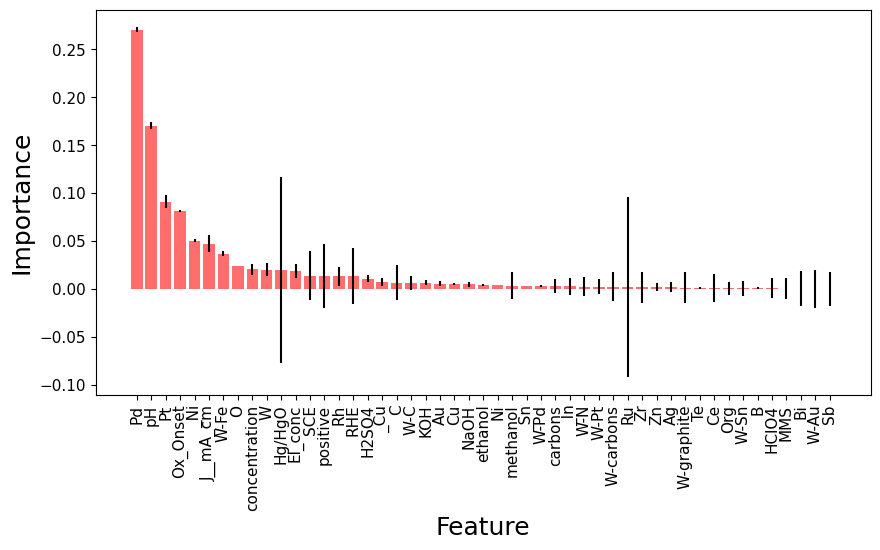

In [40]:
random_forest = rf

feature_importance = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': average_feature_importances})

feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

std_deviation = np.std([tree.feature_importances_ for tree in random_forest.estimators_], axis=0)
feature_importance_df['Std_Dev'] = std_deviation

bar_color = '#ff5757dd'

plt.figure(figsize=(10, 5))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color=bar_color, yerr=feature_importance_df['Std_Dev'])
plt.xticks(rotation=90, fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel('Feature', fontsize=18)
plt.ylabel('Importance', fontsize=18)
plt.savefig("grafico_sem_fundo.png", bbox_inches='tight', transparent=True)
plt.show()

In [41]:
# SHAP

model = RandomForestRegressor(n_estimators=100, random_state=45)
model.fit(X_train, y_train)

explainer = shap.Explainer(model)

shap_values = explainer.shap_values(X_test)

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0, :])

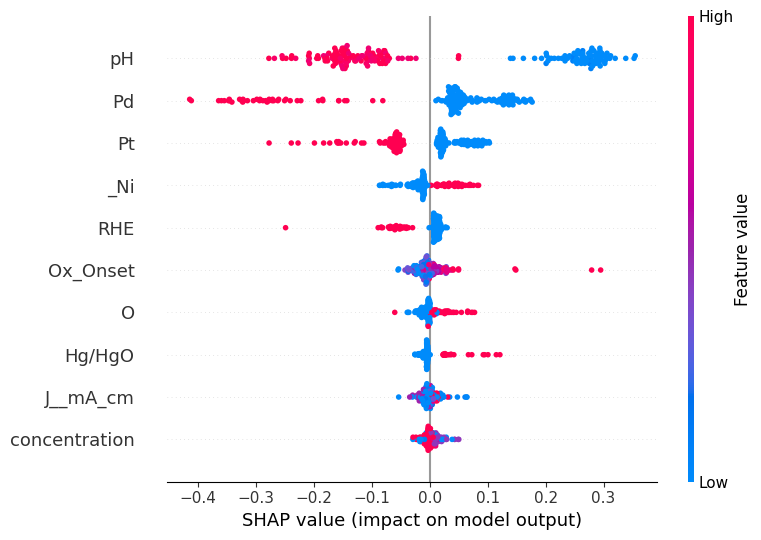

In [42]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

num_features = 10

shap.summary_plot(shap_values, X_test, max_display=num_features)

# Onset Potential Prediction

## Features selection

From the database, an analysis of the correlation between the features and the oxidation potential led to the selection of 40 features to develop Model 1 for the onset potential prediction. For Model 2, it was used the features for the oxidation potential prediction model, including the oxidation potential itself.


### Model 1

In [43]:
# organizing the database

date = pd.read_csv('https://raw.githubusercontent.com/TWvonZuben/methanol-and-ethanol-oxidation/main/date_july.csv')

#Join Graphene:

#rGO, GO and G together

#GO, GO -> O

G_modification = date[["G","GO","rGO"]]
G_modification = G_modification.sum(axis = 1)

date.insert(loc=76, column = 'graphene', value = G_modification)


date['graphene'] = date['graphene'].replace(2,1)
date['graphene'] = date['graphene'].replace(3,1)
date['graphene'] = date['graphene'].replace(4,1)

#Join N

#aniline -> N

N_modification = date[["N","Aniline"]]
N_modification = N_modification.sum(axis = 1)

date.insert(loc=76, column = 'N_Aniline', value = N_modification)

date['N_Aniline'] = date['N_Aniline'].replace(2,1)

#Polymer, Org, MOF, CNT, C, graphene -> C

C_modification = date[["C","Polymer", "MOF", "CNT","graphene"]]
C_modification = C_modification.sum(axis = 1)

date.insert(loc=76, column = 'carbons', value = C_modification)

date['carbons'] = date['carbons'].replace(2,1)
date['carbons'] = date['carbons'].replace(3,1)
date['carbons'] = date['carbons'].replace(4,1)
date['carbons'] = date['carbons'].replace(5,1)
date['carbons'] = date['carbons'].replace(6,1)

## join materials and working electrode base

C_modification = date[["C","W-C"]]
C_modification = C_modification.sum(axis = 1)

date.insert(loc=76, column = '_C', value = C_modification)

date['_C'] = date['_C'].replace(2,1)

Ni_modification = date[["Ni","W-Ni"]]
Ni_modification = Ni_modification.sum(axis = 1)

Ti_modification = date[["Ti","W-Ti"]]
Ti_modification = Ti_modification.sum(axis = 1)

date.insert(loc=76, column = '_Ni', value = Ni_modification)
date.insert(loc=76, column = '_Ti', value = Ti_modification)

date['_Ni'] = date['_Ni'].replace(2,1)
date['_Ti'] = date['_Ti'].replace(3,1)

Pt_modification = date[["Pt","W-Pt"]]
Pt_modification = Pt_modification.sum(axis = 1)

Au_modification = date[["Au","W-Au"]]
Au_modification = Au_modification.sum(axis = 1)

Cu_modification = date[["Cu","W-Cu"]]
Cu_modification = Cu_modification.sum(axis = 1)


date.insert(loc=76, column = '_Pt', value = Pt_modification)
date.insert(loc=76, column = '_Au', value = Au_modification)
date.insert(loc=76, column = '_Cu', value = Cu_modification)


date['_Pt'] = date['_Pt'].replace(2,1)
date['_Au'] = date['_Au'].replace(2,1)
date['_Cu'] = date['_Cu'].replace(2,1)


Pd_modification = date[["Pd","W-Pd"]]
Pd_modification = Pd_modification.sum(axis = 1)

date.insert(loc=76, column = '_Pd', value = Pd_modification)


date['_Pd'] = date['_Pd'].replace(2,1)

In_modification = date[["In","W-In"]]
In_modification = In_modification.sum(axis = 1)

date.insert(loc=76, column = '_In', value = In_modification)


date['_In'] = date['_In'].replace(2,1)

Sn_modification = date[["Sn","W-Sn"]]
Sn_modification = Sn_modification.sum(axis = 1)

date.insert(loc=6, column = '_Sn', value = Sn_modification)

date['_Sn'] = date['_Sn'].replace(2,1)

Fe_modification = date[["Fe","W-Fe"]]
Fe_modification = Fe_modification.sum(axis = 1)

date.insert(loc=76, column = '_Fe', value = Fe_modification)


date['_Fe'] = date['_Fe'].replace(2,1)

Al_modification = date[["Al","W-Al"]]
Al_modification = Al_modification.sum(axis = 1)

date.insert(loc=76, column = '_Al', value = Al_modification)


date['_Al'] = date['_Al'].replace(2,1)


Pl_modification = date[["Polymer","W-Polymer"]]
Pl_modification = Pl_modification.sum(axis = 1)

date.insert(loc=76, column = '_Polymer', value = Pl_modification)


date['_Polymer'] = date['_Polymer'].replace(2,1)


W_carbon_modification = date[["W-graphite","W-GCE", "W-graphene", "W-Polymer"]]
W_carbon_modification = W_carbon_modification.sum(axis = 1)

date.insert(loc=76, column = 'W-carbons', value = W_carbon_modification)

date['W-carbons'] = date['W-carbons'].replace(2,1)
date['W-carbons'] = date['W-carbons'].replace(4,1)
date['W-carbons'] = date['W-carbons'].replace(4,1)
date['W-carbons'] = date['W-carbons'].replace(4,1)
date['W-carbons'] = date['W-carbons'].replace(5,1)


carbon_modification = date[["W-carbons","carbons"]]
carbon_modification = carbon_modification.sum(axis=1)


date.insert(loc=76, column = '_carbons', value = carbon_modification)

date['_carbons'] = date['_carbons'].replace(2,1)

N_modification = date[["W-N","N"]]
N_modification = N_modification.sum(axis = 1)

date.insert(loc=76, column = '_N', value = N_modification)

date['_N'] = date['_N'].replace(2,1)


aniline_modification = date[["Aniline","_N"]]
aniline_modification = aniline_modification.sum(axis = 1)

date.insert(loc=76, column = '_Aniline_N', value = aniline_modification)

date['_Aniline_N'] = date['_Aniline_N'].replace(2,1)

positivo_modification = date[["_Sn","_N", 'La','Aniline','Ce','W']]
positivo_modification = positivo_modification.sum(axis = 1)

date.insert(loc=76, column = 'positive', value = positivo_modification)

date['positive'] = date['positive'].replace(2,1)
date['positive'] = date['positive'].replace(3,1)
date['positive'] = date['positive'].replace(4,1)
date['positive'] = date['positive'].replace(5,1)
date['positive'] = date['positive'].replace(6,1)
date['positive'] = date['positive'].replace(7,1)

negativo_modification = date[["Rh","Sb", 'B']]
negativo_modification = negativo_modification.sum(axis = 1)

date.insert(loc=76, column = 'negative', value = negativo_modification)

date['negative'] = date['negative'].replace(2,1)
date['negative'] = date['negative'].replace(3,1)


In [44]:
eletrolyte = pd.get_dummies(date["Eletrolyte"])
reference = pd.get_dummies(date["reference"])

In [45]:
date_features = date.copy()

In [46]:
date_features = date_features.join(eletrolyte)
date_features = date_features.join(reference)

In [47]:
date_features = date_features.drop("DOI", axis=1)
date_features = date_features.drop("Ano", axis=1)
date_features = date_features.drop("WE", axis=1)
date_features = date_features.drop("Material", axis=1)
date_features = date_features.drop("analyte", axis=1)
date_features = date_features.drop("Eletrolyte", axis=1)
date_features = date_features.drop("reference", axis=1)

In [48]:
features_normalized = date_features.loc[:, :].values

# scalando as features (mean = 0 and variance = 1)
features_normalized = StandardScaler().fit_transform(features_normalized)
features_normalized = pd.DataFrame(features_normalized)

header = list(date_features.columns.values)
features_normalized.set_axis(header, axis=1,inplace=True)
correlation = features_normalized.corr()

DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead


In [49]:
correlation.to_csv('correlation.csv')

In [50]:
date_model_onset = date_features.copy()
date_model_onset.dropna(subset = ['Pot_Onset_V (SHE)'], axis=0, inplace = True)
date_model_onset.dropna(subset = ['pH'], axis=0, inplace = True)
date_model_onset.dropna(subset = ['El_conc'], axis=0, inplace = True)

In [51]:
mean_J = date_model_onset['J__mA_cm'].mean()
date_model_onset['J__mA_cm'] = date_model_onset['J__mA_cm'].replace(np.nan, mean_J)

In [52]:
mean_conc = date_model_onset['concentration'].mean()
date_model_onset['concentration'] = date_model_onset['concentration'].replace(np.nan, mean_conc)

In [53]:
mean_ox = date_model_onset['Ox_Onset'].mean()
date_model_onset['Ox_Onset'] = date_model_onset['Ox_Onset'].replace(np.nan, mean_ox)

In [54]:
date_model_onset = date_model_onset.replace(np.nan,0)

### Model 2

In [55]:
# organizing the database
date = pd.read_csv('https://raw.githubusercontent.com/TWvonZuben/methanol-and-ethanol-oxidation/main/date_july.csv')

#Join Graphene:

#rGO, GO and G together

#GO, GO -> O

G_modification = date[["G","GO","rGO"]]
G_modification = G_modification.sum(axis = 1)

date.insert(loc=76, column = 'graphene', value = G_modification)


date['graphene'] = date['graphene'].replace(2,1)
date['graphene'] = date['graphene'].replace(3,1)
date['graphene'] = date['graphene'].replace(4,1)

#Join N

#aniline -> N

N_modification = date[["N","Aniline"]]
N_modification = N_modification.sum(axis = 1)

date.insert(loc=76, column = 'N_Aniline', value = N_modification)

date['N_Aniline'] = date['N_Aniline'].replace(2,1)

#Polymer, Org, MOF, CNT, C, graphene -> C

C_modification = date[["C","Polymer", "MOF", "graphene", 'CNT', 'Org']]
C_modification = C_modification.sum(axis = 1)

date.insert(loc=76, column = 'carbons', value = C_modification)

date['carbons'] = date['carbons'].replace(2,1)
date['carbons'] = date['carbons'].replace(3,1)
date['carbons'] = date['carbons'].replace(4,1)
date['carbons'] = date['carbons'].replace(5,1)
date['carbons'] = date['carbons'].replace(6,1)

## join materials and working electrode base

C_modification = date[["C","W-C"]]
C_modification = C_modification.sum(axis = 1)

date.insert(loc=76, column = '_C', value = C_modification)

date['_C'] = date['_C'].replace(2,1)

Ni_modification = date[["Ni","W-Ni"]]
Ni_modification = Ni_modification.sum(axis = 1)

Ti_modification = date[["Ti","W-Ti"]]
Ti_modification = Ti_modification.sum(axis = 1)

date.insert(loc=76, column = '_Ni', value = Ni_modification)
date.insert(loc=76, column = '_Ti', value = Ti_modification)

date['_Ni'] = date['_Ni'].replace(2,1)
date['_Ti'] = date['_Ti'].replace(3,1)

Pt_modification = date[["Pt","W-Pt"]]
Pt_modification = Pt_modification.sum(axis = 1)

Au_modification = date[["Au","W-Au"]]
Au_modification = Au_modification.sum(axis = 1)

Cu_modification = date[["Cu","W-Cu"]]
Cu_modification = Cu_modification.sum(axis = 1)


date.insert(loc=76, column = '_Pt', value = Pt_modification)
date.insert(loc=76, column = '_Au', value = Au_modification)
date.insert(loc=76, column = '_Cu', value = Cu_modification)


date['_Pt'] = date['_Pt'].replace(2,1)
date['_Au'] = date['_Au'].replace(2,1)
date['_Cu'] = date['_Cu'].replace(2,1)


Pd_modification = date[["Pd","W-Pd"]]
Pd_modification = Pd_modification.sum(axis = 1)

date.insert(loc=76, column = '_Pd', value = Pd_modification)


date['_Pd'] = date['_Pd'].replace(2,1)

In_modification = date[["In","W-In"]]
In_modification = In_modification.sum(axis = 1)

date.insert(loc=76, column = '_In', value = In_modification)


date['_In'] = date['_In'].replace(2,1)

Sn_modification = date[["Sn","W-Sn"]]
Sn_modification = Sn_modification.sum(axis = 1)

date.insert(loc=6, column = '_Sn', value = Sn_modification)

date['_Sn'] = date['_Sn'].replace(2,1)

Fe_modification = date[["Fe","W-Fe"]]
Fe_modification = Fe_modification.sum(axis = 1)

date.insert(loc=76, column = '_Fe', value = Fe_modification)


date['_Fe'] = date['_Fe'].replace(2,1)

Al_modification = date[["Al","W-Al"]]
Al_modification = Al_modification.sum(axis = 1)

date.insert(loc=76, column = '_Al', value = Al_modification)


date['_Al'] = date['_Al'].replace(2,1)


Pl_modification = date[["Polymer","W-Polymer"]]
Pl_modification = Pl_modification.sum(axis = 1)

date.insert(loc=76, column = '_Polymer', value = Pl_modification)


date['_Polymer'] = date['_Polymer'].replace(2,1)


W_carbon_modification = date[["W-GCE", "W-graphene", "W-C", "W-Polymer"]]
W_carbon_modification = W_carbon_modification.sum(axis = 1)

date.insert(loc=76, column = 'W-carbons', value = W_carbon_modification)

date['W-carbons'] = date['W-carbons'].replace(2,1)
date['W-carbons'] = date['W-carbons'].replace(4,1)
date['W-carbons'] = date['W-carbons'].replace(4,1)
date['W-carbons'] = date['W-carbons'].replace(4,1)
date['W-carbons'] = date['W-carbons'].replace(5,1)


carbon_modification = date[["W-carbons","carbons"]]
carbon_modification = carbon_modification.sum(axis=1)


date.insert(loc=76, column = '_carbons', value = carbon_modification)

date['_carbons'] = date['_carbons'].replace(2,1)

N_modification = date[["W-N","N"]]
N_modification = N_modification.sum(axis = 1)

date.insert(loc=76, column = '_N', value = N_modification)

date['_N'] = date['_N'].replace(2,1)


aniline_modification = date[["Aniline","_N"]]
aniline_modification = aniline_modification.sum(axis = 1)

date.insert(loc=76, column = '_Aniline_N', value = aniline_modification)

date['_Aniline_N'] = date['_Aniline_N'].replace(2,1)


positive_modification = date[["_Sn","W-Ti", 'Si','W-In','Fe','W-Ni','La']]
positive_modification = positive_modification.sum(axis = 1)

date.insert(loc=76, column = 'positive', value = positive_modification)

date['positive'] = date['positive'].replace(2,1)
date['positive'] = date['positive'].replace(3,1)
date['positive'] = date['positive'].replace(4,1)
date['positive'] = date['positive'].replace(5,1)
date['positive'] = date['positive'].replace(6,1)
date['positive'] = date['positive'].replace(7,1)

negative_modification = date[['Cu','_Cu']]
negative_modification = negative_modification.sum(axis = 1)

date.insert(loc=76, column = 'negative', value = negative_modification)

date['negative'] = date['negative'].replace(2,1)
date['negative'] = date['negative'].replace(3,1)
date['negative'] = date['negative'].replace(4,1)

In [56]:
eletrolyte = pd.get_dummies(date["Eletrolyte"])
reference = pd.get_dummies(date["reference"])

In [57]:
date_features = date.copy()

In [58]:
date_features = date_features.join(eletrolyte)
date_features = date_features.join(reference)

In [59]:
date_features = date_features.drop("DOI", axis=1)
date_features = date_features.drop("Ano", axis=1)
date_features = date_features.drop("WE", axis=1)
date_features = date_features.drop("Material", axis=1)
date_features = date_features.drop("analyte", axis=1)
date_features = date_features.drop("Eletrolyte", axis=1)
date_features = date_features.drop("reference", axis=1)

In [60]:
date_model = date_features.copy()
date_model.dropna(subset = ['Pot_Ox_V (SHE)'], axis=0, inplace = True)
date_model.dropna(subset = ['pH'], axis=0, inplace = True)
date_model.dropna(subset = ['El_conc'], axis=0, inplace = True)

In [61]:
mean_J = date_model['J__mA_cm'].mean()
date_model['J__mA_cm'] = date_model['J__mA_cm'].replace(np.nan, mean_J)

In [62]:
mean_conc = date_model['concentration'].mean()
date_model['concentration'] = date_model['concentration'].replace(np.nan, mean_conc)

In [63]:
mean_ox = date_model['Ox_Onset'].mean()
date_model['Ox_Onset'] = date_model['Ox_Onset'].replace(np.nan, mean_ox)

In [64]:
date_model = date_model.replace(np.nan,0)

In [65]:
X = date_model[['W-carbons','carbons','C', 'Org', 'W-graphite','W-C', 'W-Sn','W-Au','Au','W-Pd','Pd','_In','W-Fe','_Ni','Ni','Pt','W-Pt', 'W-N','O','Zn','Ag','Ru','B','Zr','Ce','Bi','W','Sb','Te', 'Cu', '_Cu', 'Rh','_Sn', 'positive','pH','El_conc','methanol','ethanol','H2SO4','HClO4','KOH','NaOH','Hg/HgO','MMS','RHE','SCE', 'J__mA_cm', 'concentration', 'Ox_Onset', 'Pot_Ox_V (SHE)','Pot_Onset_V (SHE)']]
y = date_model[['Pot_Ox_V (SHE)', 'Pot_Onset_V (SHE)']]

### Settings

It is necessary to ensure that the same data will be used for Model 1 and Model 2

In [66]:
# model 1

X_model1 = date_model_onset[['W-C','W-carbons','C','Org', 'W-Sn','_Au','W-Ti','Pd','W-Pd','_In','W-Fe','Ni','W-Ni','Pt','W-Pt','W-N','O','Zn','Ag','Co','S','Bi','Te', 'negative','positive', 'Ru','Aniline', '_N', 'pH','El_conc','J__mA_cm','methanol','ethanol','HClO4','NaOH','Hg/HgO','MMS','RHE','SCE', 'concentration']]
y_model1 = date_model_onset['Pot_Onset_V (SHE)']



In [67]:
# model 2

X = date_model[['W-carbons','carbons','C', 'Org', 'W-graphite','W-C', 'W-Sn','W-Au','Au','W-Pd','Pd','_In','W-Fe','_Ni','Ni','Pt','W-Pt', 'W-N','O','Zn','Ag','Ru','B','Zr','Ce','Bi','W','Sb','Te', 'Cu', '_Cu', 'Rh','_Sn', 'positive','pH','El_conc','methanol','ethanol','H2SO4','HClO4','KOH','NaOH','Hg/HgO','MMS','RHE','SCE', 'J__mA_cm', 'concentration', 'Ox_Onset', 'Pot_Ox_V (SHE)','Pot_Onset_V (SHE)']]
y = date_model[['Pot_Ox_V (SHE)', 'Pot_Onset_V (SHE)']]




In [68]:
# Organizing the test data
different_indices = X.index.difference(X_model1.index)
X = X.drop(different_indices)
different_indices = X_model1.index.difference(X.index)
X_model1 = X_model1.drop(different_indices)

different_indices = y.index.difference(y_model1.index)
y = y.drop(different_indices)
different_indices = y_model1.index.difference(date_model.index)
y_model1 = y_model1.drop(different_indices)

## Model 1

### Algorithm study

Comparison between the algorithms used to develop the model. The XGBoost regression exhibited the best results and was selected.

#### Linear regression

In [69]:
X = X_model1.copy()
y = y_model1.copy()

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
reg_model = linear_model.LinearRegression()

reg_model = LinearRegression().fit(X_train, y_train)

print('Intercept: ',reg_model.intercept_)

list(zip(X, reg_model.coef_))

y_pred= reg_model.predict(X_test)
x_pred= reg_model.predict(X_train)

reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)

print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)


Intercept:  0.9375709582552821
Mean Absolute Error: 0.22163476539349067
Mean Square Error: 0.0845910249788956
Root Mean Square Error: 0.2908453626566798
R2 Score: 0.6006555448494624


Intercept:  0.9375709582552821

Mean Absolute Error: 0.22163476539349067

Mean Square Error: 0.0845910249788956

Root Mean Square Error: 0.2908453626566798

R2 Score: 0.6006555448494624

#### Random forest regression

In [70]:
X = X_model1.copy()
y = y_model1.copy()


X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

model = RandomForestRegressor(random_state=7)
model.fit(X_train, y_train)

y_pred= model.predict(X_test)

reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)

print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)

Mean Absolute Error: 0.1598999003310415
Mean Square Error: 0.050526735620250826
Root Mean Square Error: 0.22478152864559584
R2 Score: 0.7614691190721666


Mean Absolute Error: 0.1598999003310415

Mean Square Error: 0.050526735620250826

Root Mean Square Error: 0.22478152864559584

R2 Score: 0.7614691190721666


In [71]:
# Tuning the hyper-parameters for Random Forest

X = X_model1.copy()
y = y_model1.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

param_grid = {
    'n_estimators': [1,10, 50, 100, 200],
    'random_state': [0, 1, 2, 3, 4, 5 , 6, 7, 8, 9, 10],
    'max_depth': [None, 1, 2, 3, 4, 5],
    'criterion': ['friedman_mse', 'absolute_error', 'squared_error']
}

best_rmse = float('inf')
best_params = {}

for n_estimators in param_grid['n_estimators']:
  for random_state in param_grid['random_state']:
    for max_depth in param_grid['max_depth']:
      model = RandomForestRegressor(n_estimators=n_estimators, random_state = random_state)
      model.fit(X_train, y_train)

      y_pred = model.predict(X_test)
      rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

      if rmse < best_rmse :
        best_rmse = rmse
        best_params = {
        'n_estimators': n_estimators,
        'random_state': random_state,
        'max_depth': max_depth,
        }
        print(f"Best_params: n_estimators={n_estimators}, random_state={random_state}, max_depth={max_depth}")
        print(f"RMSE: {rmse:.4f}")
        print("------------------------")


      print(f"Parameters: n_estimators={n_estimators}, random_state={random_state}, max_depth={max_depth}")
      print(f"RMSE: {rmse:.4f}")
      print("------------------------")

best_model = RandomForestRegressor(**best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('Best parameters:', best_params)
print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)

Best_params: n_estimators=1, random_state=0, max_depth=None
RMSE: 0.3567
------------------------
Parameters: n_estimators=1, random_state=0, max_depth=None
RMSE: 0.3567
------------------------
Parameters: n_estimators=1, random_state=0, max_depth=1
RMSE: 0.3567
------------------------
Parameters: n_estimators=1, random_state=0, max_depth=2
RMSE: 0.3567
------------------------
Parameters: n_estimators=1, random_state=0, max_depth=3
RMSE: 0.3567
------------------------
Parameters: n_estimators=1, random_state=0, max_depth=4
RMSE: 0.3567
------------------------
Parameters: n_estimators=1, random_state=0, max_depth=5
RMSE: 0.3567
------------------------
Best_params: n_estimators=1, random_state=1, max_depth=None
RMSE: 0.2755
------------------------
Parameters: n_estimators=1, random_state=1, max_depth=None
RMSE: 0.2755
------------------------
Parameters: n_estimators=1, random_state=1, max_depth=1
RMSE: 0.2755
------------------------
Parameters: n_estimators=1, random_state=1, ma

Best parameters: {'n_estimators': 10, 'random_state': 10, 'max_depth': None}

Mean Absolute Error: 0.14733036541889483

Mean Square Error: 0.04255925276575342

Root Mean Square Error: 0.20629894029236653

R2 Score: 0.7990826850532424

In [72]:
best_results = []

for random_state in range(1, 101):

    model = RandomForestRegressor(n_estimators=10, random_state=random_state)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    best_results.append({'Random State': random_state, 'RMSE': rmse, 'R2 Score': r2})

results_df = pd.DataFrame(best_results)

sorted_results = results_df.sort_values(by='RMSE', ascending=True)

In [73]:
best_20_onset_1_RF = pd.DataFrame(sorted_results.head(20))
best_20_onset_1_RF = best_20_onset_1_RF.reset_index(drop=True)

In [74]:
predicted = []

for i in range (0,20) :

  model = RandomForestRegressor(n_estimators=10, random_state=best_20_onset_1_RF['Random State'][i])
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  predicted.append(y_pred)

predicted_result = pd.DataFrame(predicted)

In [75]:
results = []

for i in range (1,21) :
  selected_rows = predicted_result.iloc[0:i]

  sum_rows = selected_rows.sum(axis=0)
  num_rows = selected_rows.shape[0]

  mean_values_rows = sum_rows / num_rows

  mae = metrics.mean_absolute_error(y_test, mean_values_rows)
  mse = metrics.mean_squared_error(y_test, mean_values_rows)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, mean_values_rows)

  results.append({'Number': i, 'RMSE': rmse, 'R2 Score': r2})

In [76]:
results = pd.DataFrame(results)

In [79]:
display(results)

,Number,RMSE,R2 Score
0,1,0.202592,0.806238
1,2,0.199632,0.811858
2,3,0.198469,0.814045
3,4,0.196828,0.817107
4,5,0.197711,0.815463
5,6,0.197427,0.815991
6,7,0.197801,0.815295
7,8,0.197932,0.815050
8,9,0.198058,0.814813
9,10,0.198350,0.814268


Number = 4

RMSE = 0.196828

R² = 	0.817107

<Figure size 800x500 with 0 Axes>

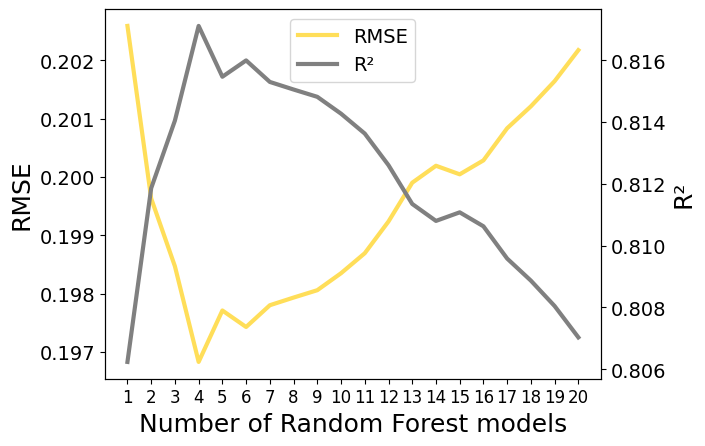

In [83]:
x = results['Number']
y1 = results['RMSE']
y2 = results['R2 Score']

plt.figure(figsize=(8, 5))

fig, ax1 = plt.subplots()

line1 = ax1.plot(x, y1, color='#ffde59', label='RMSE', linewidth=3)
ax1.set_xlabel('Number of Random Forest models', fontsize=18)
ax1.set_ylabel('RMSE', fontsize=18)
ax1.tick_params(axis='y', labelsize=14)

ax2 = ax1.twinx()
line2 = ax2.plot(x, y2, color='gray', label='R²', linewidth=3)
ax2.set_ylabel('R²', fontsize=18)
ax2.tick_params(axis='y', labelsize=14)

lines = line1 + line2
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper center', fontsize=14)

ax1.set_xticks(x)
ax1.set_xticklabels(x.astype(int), fontsize=12)

plt.show()

#### XGBoost Regression

In [84]:
X = X_model1.copy()
y = y_model1.copy()

_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)


model = xgb.XGBRegressor()
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=0)

y_pred= model.predict(X_test)

reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)

print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)

Mean Absolute Error: 0.1516055113724687
Mean Square Error: 0.044137733350288894
Root Mean Square Error: 0.2100898221006646
R2 Score: 0.7916308605936819


In [85]:
# Tuning the hyper-parameters for XGBoost regression

X = X_model1.copy()
y = y_model1.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

param_grid = {
    'n_estimators': [1,10, 50, 100, 200],
    'random_state': [0, 1, 2, 3, 4, 5 , 6, 7, 8, 9, 10],
    'max_depth': [None, 1, 2, 3, 4, 5],
    'criterion': ['friedman_mse', 'absolute_error', 'squared_error']
}

best_rmse = float('inf')
best_params = {}

for n_estimators in param_grid['n_estimators']:
  for random_state in param_grid['random_state']:
    for max_depth in param_grid['max_depth']:
      model = xgb.XGBRegressor(n_estimators=n_estimators, random_state = random_state)
      model.fit(X_train, y_train)

      y_pred = model.predict(X_test)
      rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

      if rmse < best_rmse :
        best_rmse = rmse
        best_params = {
        'n_estimators': n_estimators,
        'random_state': random_state,
        'max_depth': max_depth,
        }
        print(f"Best_params: n_estimators={n_estimators}, random_state={random_state}, max_depth={max_depth}")
        print(f"RMSE: {rmse:.4f}")
        print("------------------------")


print(f"Parameters: n_estimators={n_estimators}, random_state={random_state}, max_depth={max_depth}")
print(f"RMSE: {rmse:.4f}")
print("------------------------")

model = xgb.XGBRegressor(**best_params)
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=0)

y_pred= model.predict(X_test)

reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('Best parameters:', best_params)
print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)

Best_params: n_estimators=1, random_state=0, max_depth=None
RMSE: 0.3755
------------------------
Best_params: n_estimators=10, random_state=0, max_depth=None
RMSE: 0.2142
------------------------
Best_params: n_estimators=50, random_state=0, max_depth=None
RMSE: 0.2061
------------------------
Parameters: n_estimators=200, random_state=10, max_depth=5
RMSE: 0.2126
------------------------
Best parameters: {'n_estimators': 50, 'random_state': 0, 'max_depth': None}
Mean Absolute Error: 0.14852992626174807
Mean Square Error: 0.04248548846575138
Root Mean Square Error: 0.2061200826357087
R2 Score: 0.7994309177907133


Best parameters: {'n_estimators': 50, 'random_state': 0, 'max_depth': None}

Mean Absolute Error: 0.14852992626174807

Mean Square Error: 0.04248548846575138

Root Mean Square Error: 0.2061200826357087

R2 Score: 0.7994309177907133

### Result of Model 1

In [165]:
predicted = []

for i in range (0,20) :

  model = RandomForestRegressor(n_estimators=10, random_state=best_20_onset_1_RF['Random State'][i])
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  predicted.append(y_pred)

predicted_result = pd.DataFrame(predicted)
y_pred_model_1 = y_pred.copy()

In [164]:
results = []

for i in range (1,21) :
  selected_rows = predicted_result.iloc[0:i]

  sum_rows = selected_rows.sum(axis=0)
  num_rows = selected_rows.shape[0]

  mean_values_rows = sum_rows / num_rows

  mae = metrics.mean_absolute_error(y_test, mean_values_rows)
  mse = metrics.mean_squared_error(y_test, mean_values_rows)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, mean_values_rows)

  results.append({'Number': i, 'RMSE': rmse, 'R2 Score': r2})

In [88]:
results = pd.DataFrame(results)

<Figure size 800x500 with 0 Axes>

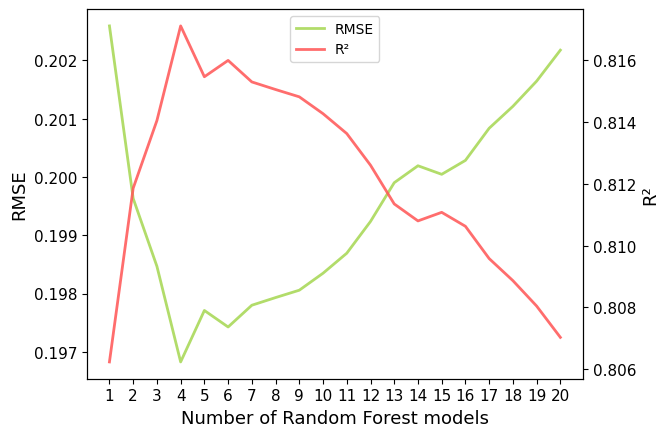

In [89]:
x = results['Number']
y1 = results['RMSE']
y2 = results['R2 Score']

plt.figure(figsize=(8, 5))

fig, ax1 = plt.subplots()

line1 = ax1.plot(x, y1, color='#7bc40095', label='RMSE', linewidth=2)
ax1.set_xlabel('Number of Random Forest models', fontsize=13)
ax1.set_ylabel('RMSE', fontsize=13)
ax1.tick_params(axis='y', labelsize=11)

ax2 = ax1.twinx()
line2 = ax2.plot(x, y2, color='#ff5757dd', label='R²', linewidth=2)
ax2.set_ylabel('R²', fontsize=13)
ax2.tick_params(axis='y', labelsize=11)

lines = line1 + line2
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper center')

ax1.set_xticks(x)
ax1.set_xticklabels(x.astype(int), fontsize=11)

plt.show()

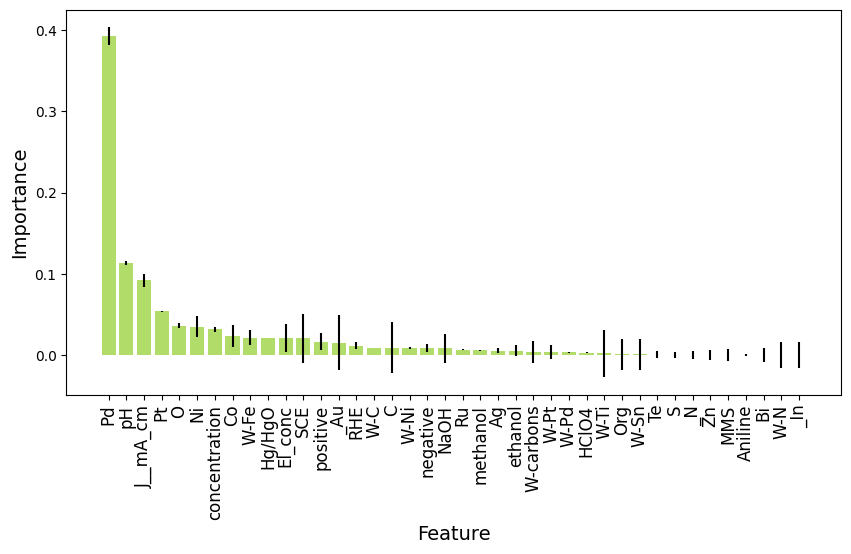

In [90]:
random_forest = model
feature_importance = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Calcular o desvio padrão das importâncias
std_deviation = np.std([tree.feature_importances_ for tree in random_forest.estimators_], axis=0)
feature_importance_df['Std_Dev'] = std_deviation

bar_color = '#7bc40095'

plt.figure(figsize=(10, 5))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color=bar_color, yerr=feature_importance_df['Std_Dev'])
plt.xticks(rotation=90, fontsize = 12)
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.show()

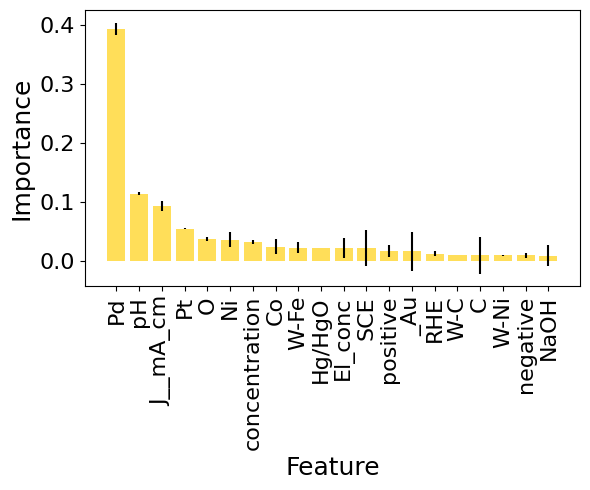

In [92]:
random_forest = model  # Replace 'model' with your actual random forest model
feature_importance = random_forest.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Calculate the standard deviation of importances
std_deviation = np.std([tree.feature_importances_ for tree in random_forest.estimators_], axis=0)
feature_importance_df['Std_Dev'] = std_deviation

# Select the top 20 features
top_features = feature_importance_df['Feature'][:20]
top_importances = feature_importance_df['Importance'][:20]
std_devs = feature_importance_df['Std_Dev'][:20]


# Define the desired color
bar_color = '#ffde59'


# Create a bar plot to visualize the feature importances
plt.figure(figsize=(6, 5))
plt.bar(range(len(top_features)), top_importances, align='center', color=bar_color, yerr=std_devs)
plt.xticks(range(len(top_features)), top_features, rotation='vertical', fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Importance', fontsize=18)
plt.xlabel('Feature', fontsize=18)
plt.tight_layout()  # Ensures proper spacing
plt.show()




In [93]:
model = RandomForestRegressor(n_estimators = 10, random_state=81)
model.fit(X_train, y_train)

# Crie um objeto SHAP explainer
explainer = shap.Explainer(model, X_train)

# Calcule os valores SHAP para uma amostra específica do conjunto de teste
sample_index = 186
shap_values = explainer(X_test.iloc[sample_index])

# Visualize os valores SHAP para a amostra específica
shap.initjs()

In [94]:
shap.force_plot(explainer.expected_value, shap_values.values, X_test.iloc[sample_index])

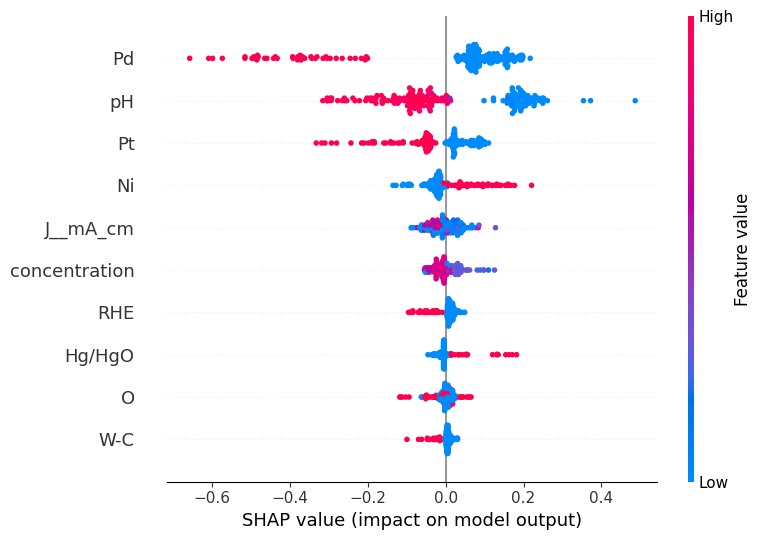

In [95]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Escolha o número de características que você deseja mostrar (no caso, as primeiras 10)
num_features = 10

# Crie um gráfico de resumo SHAP Plot mostrando apenas as primeiras 10 características
shap.summary_plot(shap_values, X_test, max_display=num_features)

In [96]:
explainer = shap.Explainer(model)
shap_values=explainer(X_test)
np.shape(shap_values)


(187, 40)

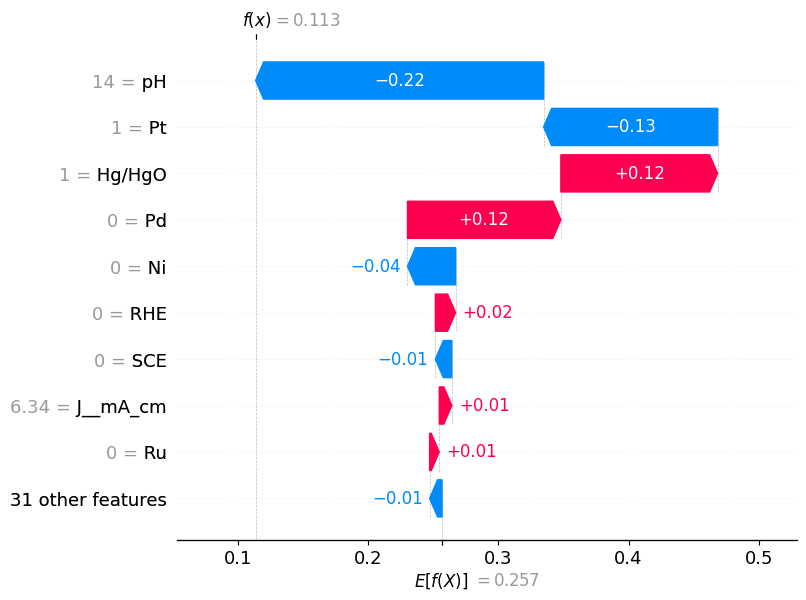

In [97]:
shap.plots.waterfall(shap_values[186])

In [98]:
# Suponha que você já tenha o modelo treinado e o conjunto de teste
random_state = 100

model = RandomForestRegressor(n_estimators = 10, random_state=81)
model.fit(X_train, y_train)


# Crie um objeto SHAP explainer
explainer = shap.Explainer(model, X_train)

# Calcule os valores SHAP para uma amostra específica do conjunto de teste
sample_index = 8
shap_values = explainer(X_test.iloc[sample_index])

# Visualize os valores SHAP para a amostra específica
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values.values, X_test.iloc[sample_index])

In [99]:
explainer = shap.Explainer(model)
shap_values=explainer(X_test)
np.shape(shap_values)

(187, 40)

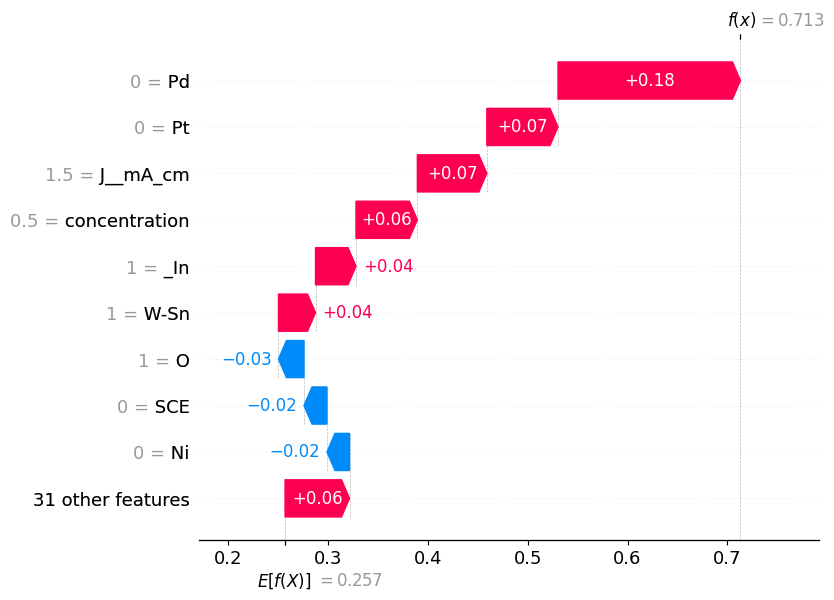

In [100]:
shap.plots.waterfall(shap_values[181])

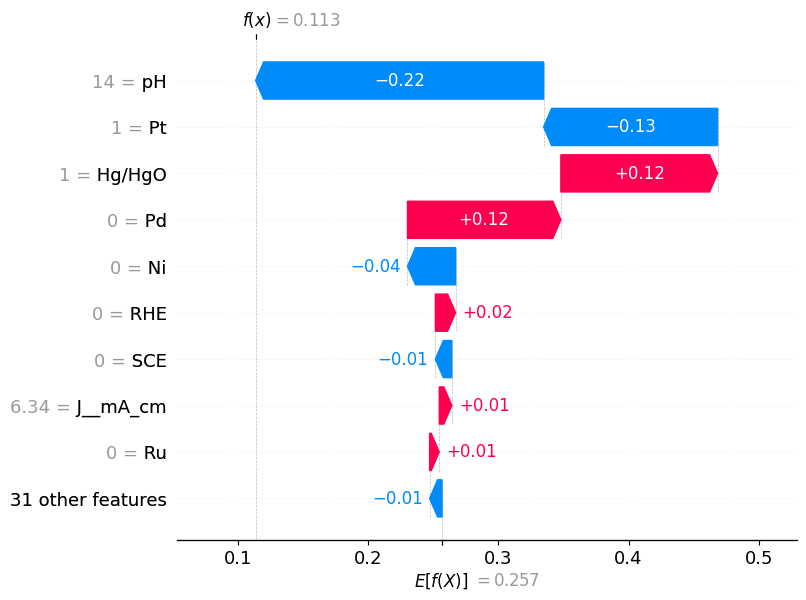

In [101]:
shap.plots.waterfall(shap_values[186])

## Model 2

### Organizing the features

It is necessary to include the predicted Oxidation Potential value in the features.

In [102]:
X = date_model[['W-carbons','carbons','C', 'Org', 'W-graphite','W-C', 'W-Sn','W-Au','Au','W-Pd','Pd','_In','W-Fe','_Ni','Ni','Pt','W-Pt', 'W-N','O','Zn','Ag','Ru','B','Zr','Ce','Bi','W','Sb','Te', 'Cu', '_Cu', 'Rh','_Sn', 'positive','pH','El_conc','methanol','ethanol','H2SO4','HClO4','KOH','NaOH','Hg/HgO','MMS','RHE','SCE', 'J__mA_cm', 'concentration', 'Ox_Onset', 'Pot_Ox_V (SHE)','Pot_Onset_V (SHE)']]
y = date_model[['Pot_Ox_V (SHE)', 'Pot_Onset_V (SHE)']]

In [103]:
# model 1

X_model1 = date_model_onset[['W-C','W-carbons','C','Org', 'W-Sn','_Au','W-Ti','Pd','W-Pd','_In','W-Fe','Ni','W-Ni','Pt','W-Pt','W-N','O','Zn','Ag','Co','S','Bi','Te', 'negative','positive', 'Ru','Aniline', '_N', 'pH','El_conc','J__mA_cm','methanol','ethanol','HClO4','NaOH','Hg/HgO','MMS','RHE','SCE', 'concentration']]
y_model1 = date_model_onset['Pot_Onset_V (SHE)']


In [104]:
# Organizing the test data
different_indices = X.index.difference(X_model1.index)
X = X.drop(different_indices)
different_indices = X_model1.index.difference(X.index)
X_model1 = X_model1.drop(different_indices)

different_indices = y.index.difference(y_model1.index)
y = y.drop(different_indices)
different_indices = y_model1.index.difference(date_model.index)
y_model1 = y_model1.drop(different_indices)

In [105]:
# oxidation potential prediction

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

X_train_2 = X_train.drop("Pot_Ox_V (SHE)", axis=1)
X_test_2 = X_test.drop("Pot_Ox_V (SHE)", axis=1)

y_train_2 = y_train['Pot_Ox_V (SHE)']
y_test_2 = y_test['Pot_Ox_V (SHE)']

X_train_2 = X_train_2.drop("Pot_Onset_V (SHE)", axis=1)
X_test_2 = X_test_2.drop("Pot_Onset_V (SHE)", axis=1)

In [106]:
predicted = []

for i in range (0,4) :

  model = RandomForestRegressor(n_estimators=100, random_state=best_20_ox['Random State'][i])
  model.fit(X_train_2, y_train_2)

  y_pred = model.predict(X_test_2)

  predicted.append(y_pred)

predicted_result = pd.DataFrame(predicted)

In [107]:
selected_rows = predicted_result.copy()

sum_rows = selected_rows.sum(axis=0)
num_rows = selected_rows.shape[0]

mean_values_rows = sum_rows / num_rows

mae = metrics.mean_absolute_error(y_test_2, mean_values_rows)
mse = metrics.mean_squared_error(y_test_2, mean_values_rows)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_2, mean_values_rows)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)

print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)

Mean Absolute Error: 0.1161982399923606
Mean Square Error: 0.03796353996875575
Root Mean Square Error: 0.19484234644644308
R2 Score: 0.7883254288469514


In [108]:
mean_values_rows = pd.DataFrame(mean_values_rows)

In [109]:
pred_oxid = mean_values_rows.copy()

In [110]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [111]:
X_test.insert(loc=49, column = 'y_pred', value = mean_values_rows)

In [112]:
X_train.dropna(subset = ['Pot_Onset_V (SHE)'], axis=0, inplace = True)
y_train.dropna(subset = ['Pot_Onset_V (SHE)'], axis=0, inplace = True)
X_test.dropna(subset = ['Pot_Onset_V (SHE)'], axis=0, inplace = True)
y_test.dropna(subset = ['Pot_Onset_V (SHE)'], axis=0, inplace = True)

In [113]:
X_train_onset = X_train.drop("Pot_Onset_V (SHE)", axis=1)
y_train_onset = y_train['Pot_Onset_V (SHE)']

In [114]:
X_test_onset = X_test.drop("Pot_Onset_V (SHE)", axis=1)
X_test_onset = X_test_onset.drop("Pot_Ox_V (SHE)", axis=1)


In [115]:
X_test_onset.rename(columns={'y_pred': 'Pot_Ox_V (SHE)'}, inplace=True)

In [116]:
y_test_onset = y_test['Pot_Onset_V (SHE)']

### Algorithm study
Comparison between the algorithms used to develop the model. The Random Forest regression exhibited the best results and was selected.

#### Linear regression

In [117]:
reg_model = linear_model.LinearRegression()

reg_model = LinearRegression().fit(X_train_onset, y_train_onset)

print('Intercept: ',reg_model.intercept_)

list(zip(X, reg_model.coef_))

y_pred= reg_model.predict(X_test_onset)
x_pred= reg_model.predict(X_train_onset)

reg_model_diff = pd.DataFrame({'Actual value': y_test_onset, 'Predicted value': y_pred})
reg_model_diff

mae = metrics.mean_absolute_error(y_test_onset, y_pred)
mse = metrics.mean_squared_error(y_test_onset, y_pred)
rmse = metrics.mean_squared_error(y_test_onset, y_pred, squared=False)
r2 = r2_score(y_test_onset, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)

print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)

Intercept:  -1.8596235662471372e-14
Mean Absolute Error: 0.11619823999236069
Mean Square Error: 0.037963539968755323
Root Mean Square Error: 0.194842346446442
R2 Score: 0.8207785141722705


Intercept:  -1.8596235662471372e-14

Mean Absolute Error: 0.11619823999236069

Mean Square Error: 0.037963539968755323

Root Mean Square Error: 0.194842346446442

R2 Score: 0.8207785141722705


#### Random Forest regression

In [118]:
model = RandomForestRegressor(random_state=7)
model.fit(X_train_onset, y_train_onset)

y_pred= model.predict(X_test_onset)

reg_model_diff = pd.DataFrame({'Actual value': y_test_onset, 'Predicted value': y_pred})
reg_model_diff

mae = metrics.mean_absolute_error(y_test_onset, y_pred)
mse = metrics.mean_squared_error(y_test_onset, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test_onset, y_pred))
r2 = r2_score(y_test_onset, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)

print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)

Mean Absolute Error: 0.11866608609625667
Mean Square Error: 0.038074015724985616
Root Mean Square Error: 0.19512564087014708
R2 Score: 0.8202569708916431


Mean Absolute Error: 0.11866608609625667

Mean Square Error: 0.038074015724985616

Root Mean Square Error: 0.19512564087014708

R2 Score: 0.8202569708916431

In [119]:
# Tuning the hyper-parameters for Random Forest

param_grid = {
    'n_estimators': [1,10, 50, 100, 200],
    'random_state': [0, 1, 2, 3, 4, 5 , 6, 7, 8, 9, 10],
    'max_depth': [None, 1, 2, 3, 4, 5],
    'criterion': ['friedman_mse', 'absolute_error', 'squared_error']
}

best_rmse = float('inf')
best_params = {}

for n_estimators in param_grid['n_estimators']:
  for random_state in param_grid['random_state']:
    for max_depth in param_grid['max_depth']:
      model = RandomForestRegressor(n_estimators=n_estimators, random_state = random_state)
      model.fit(X_train_onset, y_train_onset)

      y_pred = model.predict(X_test_onset)
      rmse = np.sqrt(metrics.mean_squared_error(y_test_onset, y_pred))

      if rmse < best_rmse :
        best_rmse = rmse
        best_params = {
        'n_estimators': n_estimators,
        'random_state': random_state,
        'max_depth': max_depth,
        }
        print(f"Best_params: n_estimators={n_estimators}, random_state={random_state}, max_depth={max_depth}")
        print(f"RMSE: {rmse:.4f}")
        print("------------------------")


      print(f"Parameters: n_estimators={n_estimators}, random_state={random_state}, max_depth={max_depth}")
      print(f"RMSE: {rmse:.4f}")
      print("------------------------")

best_model = RandomForestRegressor(**best_params)
best_model.fit(X_train_onset, y_train_onset)
y_pred = best_model.predict(X_test_onset)

mae = metrics.mean_absolute_error(y_test_onset, y_pred)
mse = metrics.mean_squared_error(y_test_onset, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test_onset, y_pred))
r2 = r2_score(y_test_onset, y_pred)

print('Best parameters:', best_params)
print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)

Best_params: n_estimators=1, random_state=0, max_depth=None
RMSE: 0.2206
------------------------
Parameters: n_estimators=1, random_state=0, max_depth=None
RMSE: 0.2206
------------------------
Parameters: n_estimators=1, random_state=0, max_depth=1
RMSE: 0.2206
------------------------
Parameters: n_estimators=1, random_state=0, max_depth=2
RMSE: 0.2206
------------------------
Parameters: n_estimators=1, random_state=0, max_depth=3
RMSE: 0.2206
------------------------
Parameters: n_estimators=1, random_state=0, max_depth=4
RMSE: 0.2206
------------------------
Parameters: n_estimators=1, random_state=0, max_depth=5
RMSE: 0.2206
------------------------
Best_params: n_estimators=1, random_state=1, max_depth=None
RMSE: 0.2171
------------------------
Parameters: n_estimators=1, random_state=1, max_depth=None
RMSE: 0.2171
------------------------
Parameters: n_estimators=1, random_state=1, max_depth=1
RMSE: 0.2171
------------------------
Parameters: n_estimators=1, random_state=1, ma

Best parameters: {'n_estimators': 50, 'random_state': 1, 'max_depth': None}

Mean Absolute Error: 0.11652091122994652

Mean Square Error: 0.0365217581961108

Root Mean Square Error: 0.19110666706347743

R2 Score: 0.827584999335281

In [120]:
best_results = []

for random_state in range(1, 101):

    model = RandomForestRegressor(n_estimators=50, random_state=random_state)
    model.fit(X_train_onset, y_train_onset)

    y_pred = model.predict(X_test_onset)

    mae = metrics.mean_absolute_error(y_test_onset, y_pred)
    mse = metrics.mean_squared_error(y_test_onset, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_onset, y_pred)

    best_results.append({'Random State': random_state, 'RMSE': rmse, 'R2 Score': r2})

results_df = pd.DataFrame(best_results)

sorted_results = results_df.sort_values(by='RMSE', ascending=True)


In [121]:
best_20_onset_2_RF = pd.DataFrame(sorted_results.head(20))
best_20_onset_2_RF = best_20_onset_2_RF.reset_index(drop=True)

In [122]:
predicted = []

for i in range (0,20) :

  model = RandomForestRegressor(n_estimators=50, random_state=best_20_onset_2_RF['Random State'][i])
  model.fit(X_train_onset, y_train_onset)

  y_pred = model.predict(X_test_onset)

  predicted.append(y_pred)

predicted_result = pd.DataFrame(predicted)

In [123]:
results = []

for i in range (1,21) :
  selected_rows = predicted_result.iloc[0:i]

  sum_rows = selected_rows.sum(axis=0)
  num_rows = selected_rows.shape[0]

  mean_values_rows = sum_rows / num_rows

  mae = metrics.mean_absolute_error(y_test_onset, mean_values_rows)
  mse = metrics.mean_squared_error(y_test_onset, mean_values_rows)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test_onset, mean_values_rows)

  results.append({'Number': i, 'RMSE': rmse, 'R2 Score': r2})

In [124]:
results = pd.DataFrame(results)

<Figure size 800x500 with 0 Axes>

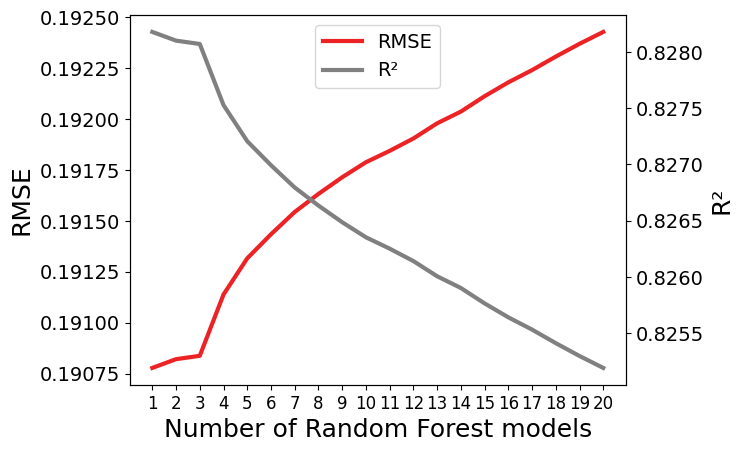

In [127]:
x = results['Number']
y1 = results['RMSE']
y2 = results['R2 Score']

plt.figure(figsize=(8, 5))

fig, ax1 = plt.subplots()

line1 = ax1.plot(x, y1, color='#ed2225', label='RMSE', linewidth=3)
ax1.set_xlabel('Number of Random Forest models', fontsize=18)
ax1.set_ylabel('RMSE', fontsize=18)
ax1.tick_params(axis='y', labelsize=14)

ax2 = ax1.twinx()
line2 = ax2.plot(x, y2, color='gray', label='R²', linewidth=3)
ax2.set_ylabel('R²', fontsize=18)
ax2.tick_params(axis='y', labelsize=14)

lines = line1 + line2
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper center', fontsize=14)

ax1.set_xticks(x)
ax1.set_xticklabels(x.astype(int), fontsize=12)

plt.show()

In [126]:
display(results)

,Number,RMSE,R2 Score
0,1,0.190778,0.828178
1,2,0.190821,0.828101
2,3,0.190837,0.828071
3,4,0.191139,0.827528
4,5,0.191316,0.827206
5,6,0.191434,0.826993
6,7,0.191544,0.826795
7,8,0.191633,0.826634
8,9,0.191715,0.826486
9,10,0.191788,0.826353


Number = 1

RMSE = 0.190778

R² =	0.828178

random_state = 22

#### XGBoost Regression

In [128]:
import xgboost as xgb
from xgboost import XGBRegressor

model = xgb.XGBRegressor(n_estimators = 39)
model.fit(X_train_onset, y_train_onset)

y_pred= model.predict(X_test_onset)

reg_model_diff = pd.DataFrame({'Actual value': y_test_onset, 'Predicted value': y_pred})
reg_model_diff

mae = metrics.mean_absolute_error(y_test_onset, y_pred)
mse = metrics.mean_squared_error(y_test_onset, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test_onset, y_pred))
r2 = r2_score(y_test_onset, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)

print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)



Mean Absolute Error: 0.11756078971712028
Mean Square Error: 0.03802219011683415
Root Mean Square Error: 0.19499279503826328
R2 Score: 0.8205016335997171


Mean Absolute Error: 0.11756078971712028

Mean Square Error: 0.03802219011683415

Root Mean Square Error: 0.19499279503826328

R2 Score: 0.8205016335997171

In [129]:
best_results = []

for n_estimators in range(0, 101):

    model = xgb.XGBRegressor(n_estimators=n_estimators)
    model.fit(X_train_onset, y_train_onset)

    y_pred = model.predict(X_test_onset)

    mae = metrics.mean_absolute_error(y_test_onset, y_pred)
    mse = metrics.mean_squared_error(y_test_onset, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_onset, y_pred)

    best_results.append({'n_estimators': n_estimators, 'RMSE': rmse, 'R2 Score': r2})

results_df = pd.DataFrame(best_results)


sorted_results = results_df.sort_values(by='RMSE', ascending=True)


print(sorted_results.head(10))

    n_estimators      RMSE  R2 Score
32            32  0.194814  0.820830
33            33  0.194836  0.820790
34            34  0.194838  0.820786
31            31  0.194842  0.820779
28            28  0.194849  0.820766
30            30  0.194852  0.820761
35            35  0.194856  0.820754
27            27  0.194859  0.820747
29            29  0.194860  0.820745
26            26  0.194861  0.820745


In [130]:
best_20_onset_2 = pd.DataFrame(sorted_results.head(20))
best_20_onset_2= best_20_onset_2.reset_index(drop=True)

In [131]:
predicted = []

for i in range (0,20) :

  model = xgb.XGBRegressor(n_estimators=best_20_onset_2['n_estimators'][i])
  model.fit(X_train_onset, y_train_onset)

  y_pred = model.predict(X_test_onset)

  predicted.append(y_pred)

predicted_result = pd.DataFrame(predicted)

In [132]:
results = []

for i in range (1,21) :
  selected_rows = predicted_result.iloc[0:i]

  sum_rows = selected_rows.sum(axis=0)
  num_rows = selected_rows.shape[0]

  mean_values_rows = sum_rows / num_rows

  mae = metrics.mean_absolute_error(y_test_onset, mean_values_rows)
  mse = metrics.mean_squared_error(y_test_onset, mean_values_rows)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test_onset, mean_values_rows)

  results.append({'Number': i, 'RMSE': rmse, 'R2 Score': r2})

In [133]:
results = pd.DataFrame(results)

<Figure size 800x500 with 0 Axes>

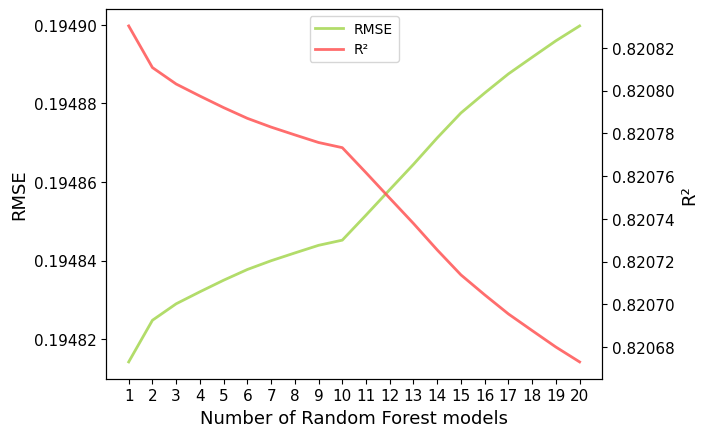

In [134]:
x = results['Number']
y1 = results['RMSE']
y2 = results['R2 Score']

plt.figure(figsize=(8, 5))

fig, ax1 = plt.subplots()

line1 = ax1.plot(x, y1, color='#7bc40095', label='RMSE', linewidth=2)
ax1.set_xlabel('Number of Random Forest models', fontsize=13)
ax1.set_ylabel('RMSE', fontsize=13)
ax1.tick_params(axis='y', labelsize=11)

ax2 = ax1.twinx()
line2 = ax2.plot(x, y2, color='#ff5757dd', label='R²', linewidth=2)
ax2.set_ylabel('R²', fontsize=13)
ax2.tick_params(axis='y', labelsize=11)

lines = line1 + line2
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper center')

ax1.set_xticks(x)
ax1.set_xticklabels(x.astype(int), fontsize=11)

plt.show()

In [135]:
display(results)

,Number,RMSE,R2 Score
0,1,0.194814,0.820830
1,2,0.194825,0.820811
2,3,0.194829,0.820803
3,4,0.194832,0.820797
4,5,0.194835,0.820792
5,6,0.194838,0.820787
6,7,0.194840,0.820783
7,8,0.194842,0.820779
8,9,0.194844,0.820776
9,10,0.194845,0.820773


Number = 1

RMSE = 0.194814

R² = 0.820830

n_estimators = 68

### Model 2

In [136]:
model = RandomForestRegressor(n_estimators=50, random_state=22)
model.fit(X_train_onset, y_train_onset)

y_pred = model.predict(X_test_onset)


In [137]:
predicted_result_model_2 = y_pred.copy()

In [138]:
mae = metrics.mean_absolute_error(y_test_onset, y_pred)
mse = metrics.mean_squared_error(y_test_onset, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_onset, y_pred)

In [139]:
print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)

print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)

Mean Absolute Error: 0.11670132941176473
Mean Square Error: 0.0363961547367138
Root Mean Square Error: 0.1907777626892448
R2 Score: 0.8281779587546807


Mean Absolute Error: 0.11670132941176473

Mean Square Error: 0.0363961547367138

Root Mean Square Error: 0.1907777626892448

R2 Score: 0.8281779587546807

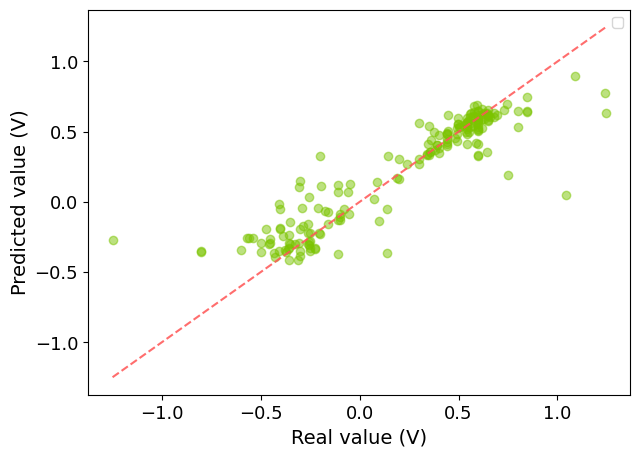

In [141]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test_onset, y_pred, c='#7bc40095', alpha=0.5)
plt.plot([min(y_test_onset), max(y_test_onset)], [min(y_test_onset), max(y_test_onset)], '--', c='#ff5757dd')
plt.xlabel('Real value (V)', fontsize=14)
plt.ylabel('Predicted value (V)', fontsize=14)
plt.title('')

plt.tick_params(axis='both', which='major', labelsize=13)
plt.legend()

plt.show()

In [142]:
y = y.drop("Pot_Ox_V (SHE)", axis=1)

In [143]:
X = X.drop("Pot_Onset_V (SHE)", axis=1)

In [144]:
# Feature Importance

model = RandomForestRegressor(n_estimators = 50, random_state=22)
model.fit(X_train_onset, y_train_onset)

importances = model.feature_importances_

In [145]:
random_forest = model
feature_importance = random_forest.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

std_deviation = np.std([tree.feature_importances_ for tree in random_forest.estimators_], axis=0)
feature_importance_df['Std_Dev'] = std_deviation

top_features = feature_importance_df['Feature'][:10]
top_importances = feature_importance_df['Importance'][:10]
std_devs = feature_importance_df['Std_Dev'][:10]

FixedFormatter should only be used together with FixedLocator


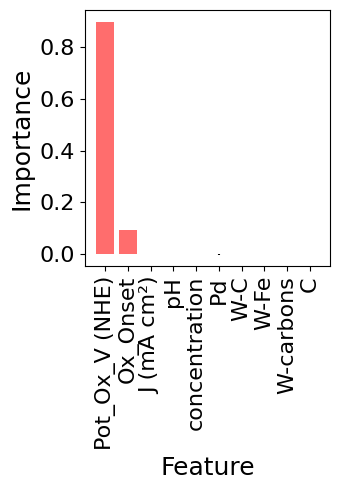

In [146]:

bar_color = '#ff5757dd'

plt.figure(figsize=(3.5, 5))
plt.bar(top_features, top_importances, color=bar_color, yerr=std_devs)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)


custom_labels = ["Pot_Ox_V (NHE)", "Ox_Onset", "J (mA cm²)", "pH", "concentration", 'Pd','W-C','W-Fe','W-carbons','C']
plt.gca().set_xticklabels(custom_labels)

plt.xlabel('Feature', fontsize=18)
plt.ylabel('Importance', fontsize=18)
plt.tight_layout()  # Ensures proper spacing
plt.show()

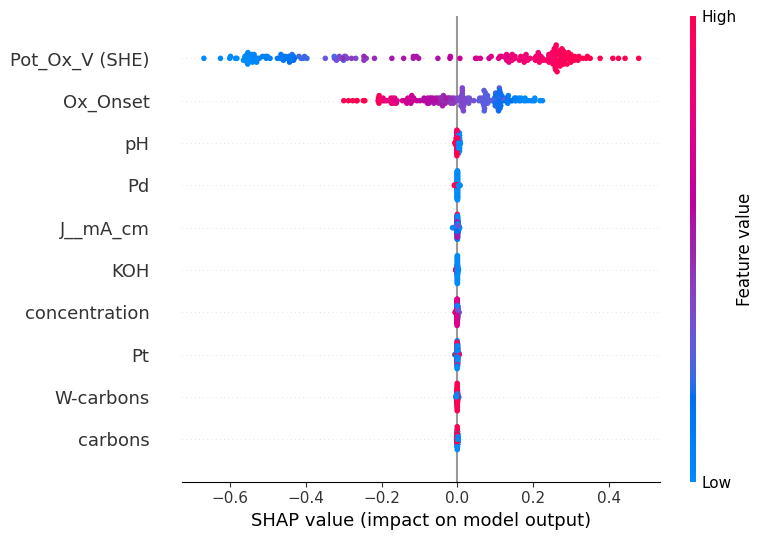

In [147]:
# SHAP

model = RandomForestRegressor(n_estimators = 50, random_state=22)
model.fit(X_train_onset, y_train_onset)

explainer = shap.Explainer(model)
shap_values = explainer(X_test_onset)


num_features = 10

shap.summary_plot(shap_values, X_test_onset, max_display=num_features)

## Model 1 + Model 2

In [206]:
# model 1

X_model1 = date_model_onset[['W-C','W-carbons','C','Org', 'W-Sn','_Au','W-Ti','Pd','W-Pd','_In','W-Fe','Ni','W-Ni','Pt','W-Pt','W-N','O','Zn','Ag','Co','S','Bi','Te', 'negative','positive', 'Ru','Aniline', '_N', 'pH','El_conc','J__mA_cm','methanol','ethanol','HClO4','NaOH','Hg/HgO','MMS','RHE','SCE', 'concentration']]
y_model1 = date_model_onset['Pot_Onset_V (SHE)']



In [207]:
# model 2

X = date_model[['W-carbons','carbons','C', 'Org', 'W-graphite','W-C', 'W-Sn','W-Au','Au','W-Pd','Pd','_In','W-Fe','_Ni','Ni','Pt','W-Pt', 'W-N','O','Zn','Ag','Ru','B','Zr','Ce','Bi','W','Sb','Te', 'Cu', '_Cu', 'Rh','_Sn', 'positive','pH','El_conc','methanol','ethanol','H2SO4','HClO4','KOH','NaOH','Hg/HgO','MMS','RHE','SCE', 'J__mA_cm', 'concentration', 'Ox_Onset', 'Pot_Ox_V (SHE)','Pot_Onset_V (SHE)']]
y = date_model[['Pot_Ox_V (SHE)', 'Pot_Onset_V (SHE)']]




In [208]:
# Organizing the test data
different_indices = X.index.difference(X_model1.index)
X = X.drop(different_indices)
different_indices = X_model1.index.difference(X.index)
X_model1 = X_model1.drop(different_indices)

different_indices = y.index.difference(y_model1.index)
y = y.drop(different_indices)
different_indices = y_model1.index.difference(date_model.index)
y_model1 = y_model1.drop(different_indices)

In [209]:
X_train,X_test, y_train, y_test = train_test_split(X_model1, y_model1, test_size = 0.3, random_state = 100)


In [218]:
#model 1

model = RandomForestRegressor(n_estimators = 10, random_state=10)
model.fit(X_train, y_train)

y_pred_model_1= model.predict(X_test)


In [219]:
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_model_1})
reg_model_diff

mae = metrics.mean_absolute_error(y_test, y_pred_model_1)
mse = metrics.mean_squared_error(y_test, y_pred_model_1)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_model_1))
r2 = r2_score(y_test, y_pred_model_1)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)

print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)


Mean Absolute Error: 0.14733036541889483
Mean Square Error: 0.04255925276575342
Root Mean Square Error: 0.20629894029236653
R2 Score: 0.7990826850532424


In [220]:
predicted = []

for i in range (0,20) :

  model = RandomForestRegressor(n_estimators=50, random_state=best_20_onset_2_RF['Random State'][i])
  model.fit(X_train_onset, y_train_onset)

  y_pred = model.predict(X_test_onset)

  predicted.append(y_pred)

predicted_result = pd.DataFrame(predicted)

In [211]:
display(predicted_result)

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.50712,0.49886,0.47374,0.32512,-0.013448,0.141132,0.56222,-0.326466,0.63290,0.628660,...,-0.391020,-0.111140,0.052168,0.112713,0.531180,0.62666,0.607340,-0.302820,-0.374740,0.325000
1,0.51060,0.48364,0.47500,0.32576,-0.001990,0.169156,0.56590,-0.343640,0.62930,0.627700,...,-0.387112,-0.101500,0.012644,0.126485,0.548200,0.62298,0.612100,-0.298920,-0.381980,0.349060
2,0.50706,0.49730,0.47832,0.33180,0.045104,0.165756,0.56564,-0.342040,0.63314,0.625860,...,-0.377878,-0.109646,0.012188,0.119166,0.537780,0.62636,0.605740,-0.298406,-0.388240,0.304454
3,0.50442,0.48830,0.47820,0.33300,-0.017350,0.146968,0.56230,-0.333660,0.62792,0.625060,...,-0.383478,-0.101860,0.017408,0.130505,0.546520,0.61738,0.605880,-0.305660,-0.390420,0.334114
4,0.51996,0.47794,0.47564,0.31838,-0.020182,0.177894,0.56724,-0.336966,0.62132,0.633894,...,-0.387492,-0.108800,0.014660,0.113207,0.569600,0.61894,0.609540,-0.298360,-0.381600,0.346080
5,0.50528,0.49812,0.47572,0.34502,-0.013873,0.121590,0.56436,-0.337080,0.63590,0.623140,...,-0.359000,-0.093820,-0.003579,0.106037,0.557900,0.62530,0.607060,-0.295180,-0.388440,0.325820
6,0.50516,0.49302,0.46596,0.33308,-0.036606,0.140088,0.56030,-0.346140,0.63104,0.631640,...,-0.390238,-0.107460,0.016389,0.108728,0.559500,0.61996,0.600060,-0.303806,-0.395766,0.362440
7,0.50158,0.48716,0.47164,0.32586,-0.013248,0.133350,0.56558,-0.338740,0.62910,0.621880,...,-0.376060,-0.101220,0.014095,0.139079,0.546900,0.62554,0.607420,-0.293280,-0.389560,0.316420
8,0.51672,0.49122,0.47422,0.33218,-0.050718,0.161122,0.56740,-0.341960,0.63032,0.629180,...,-0.386926,-0.118160,0.012801,0.140283,0.554480,0.62382,0.609380,-0.300020,-0.369960,0.330914
9,0.50976,0.49132,0.46950,0.32518,0.040304,0.166166,0.57172,-0.330280,0.61942,0.626760,...,-0.393158,-0.112860,0.037370,0.135414,0.553680,0.61610,0.608820,-0.298800,-0.380880,0.337360


In [221]:
predicted_result.loc[-1] = y_pred_model_1
predicted_result.index = predicted_result.index + 1
predicted_result.sort_index(inplace=True)

In [224]:
y_pred_best = predicted_result[0:3]

In [226]:
results = []

for i in range (1,21) :
  selected_rows = predicted_result.iloc[0:i]

  sum_rows = selected_rows.sum(axis=0)
  num_rows = selected_rows.shape[0]

  mean_values_rows = sum_rows / num_rows

  mae = metrics.mean_absolute_error(y_test_onset, mean_values_rows)
  mse = metrics.mean_squared_error(y_test_onset, mean_values_rows)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test_onset, mean_values_rows)

  results.append({'Number': i, 'RMSE': rmse, 'R2 Score': r2})

In [227]:
results = pd.DataFrame(results)

<Figure size 800x500 with 0 Axes>

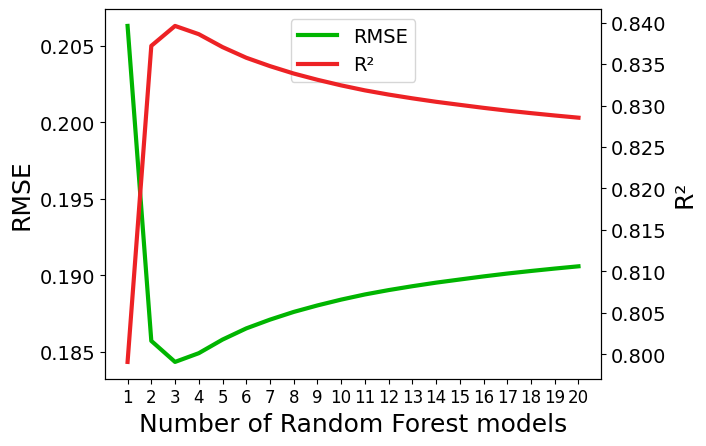

In [229]:
x = results['Number']
y1 = results['RMSE']
y2 = results['R2 Score']

plt.figure(figsize=(8, 5))

fig, ax1 = plt.subplots()

line1 = ax1.plot(x, y1, color='#00b500ff', label='RMSE', linewidth=3)
ax1.set_xlabel('Number of Random Forest models', fontsize=18)
ax1.set_ylabel('RMSE', fontsize=18)
ax1.tick_params(axis='y', labelsize=14)

ax2 = ax1.twinx()
line2 = ax2.plot(x, y2, color='#ed2225', label='R²', linewidth=3)
ax2.set_ylabel('R²', fontsize=18)
ax2.tick_params(axis='y', labelsize=14)

lines = line1 + line2
labels = [line.get_label() for line in lines]
legend = ax1.legend(lines, labels, loc='upper center', fontsize=14)
legend.get_frame().set_facecolor('none')

ax1.set_xticks(x)
ax1.set_xticklabels(x.astype(int), fontsize=12)
plt.savefig("grafico_sem_fundo.png", bbox_inches='tight', transparent=True)
plt.show()
